

<font size = "5"> **pyTEMlib : [EELS_tools](../4_EELS_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />



# Analysing Low-Loss Spectra with Drude Theory
[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/EELS/Analyse_EELS.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Spectroscopy/Analyse_EELS.ipynb)
    
part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package
Notebook by 

Gerd Duscher

Microscopy Facilities
Materials Science & Engineering<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville


Analyse EELS spectra and spectrum images.

## Content
The main feature in a low-loss EELS spectrum is the ``volume plasmon`` peak.

This ``volume plasmon`` and all other features in the ``low-loss`` region of an EELS spectrum are described by Dielectric Theory of Electrodynamics.

The simplest theory to interprete this energy range is the Drude theory. 

Another easy to observe component is the multiple scattering of this plasmon peak, which we can correct for or use for thickness determination.

>See [Notebook: Analysing Low-Loss Spectra with Drude Theory](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_03-Drude.ipynb) of the MSE672-Introduction-to-TEM Lecture in my Github account.


## Load important packages

### Check Installed Packages


In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2025.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install --upgrade git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade
# ------------------------------
print('done')

done


### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt 

import numpy as np
import sys

%load_ext autoreload
%autoreload 2

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

sys.path.insert(0,'../../')
sys.path.insert(0,'../../../sidpy/')
import sidpy

# Import libraries from pyTEMlib
import pyTEMlib
import pyTEMlib.file_tools as ft          # File input/ output library
from pyTEMlib import eels_tools  
# import pyTEMlib.info_widget3

import pyTEMlib.kinematic_scattering as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher
pyTEM version:  0.2025.02.2


In [ ]:
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
# infoWidget= pyTEMlib.info_widget3.EELSWidget()


AppLayout(children=(Tab(children=(GridspecLayout(children=(Dropdown(description='directory:', layout=Layout(gr…

IndexError: list index out of range

IndexError: list index out of range

KeyError: 'flux_ppm'

KeyError: 'flux_ppm'

In [4]:
file_widget = ft.FileWidget3()

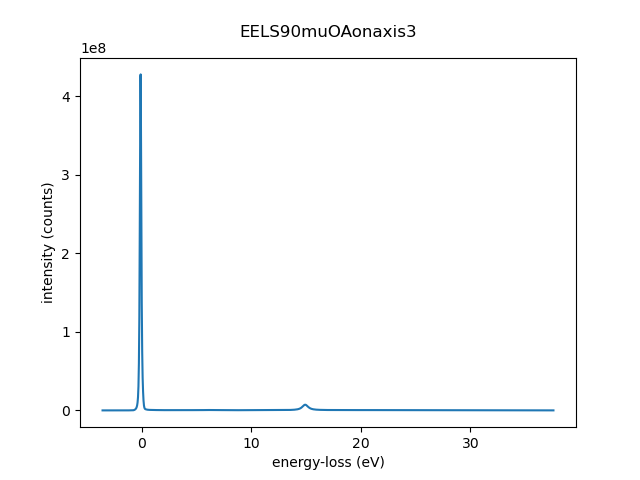

In [5]:
v =file_widget.selected_dataset.plot()

In [96]:
dir(file_widget.dataset)

['A',
 'T',
 '_Array__chunks',
 '_Array__name',
 '_Dataset__protected',
 '_Dataset__rearrange_axes',
 '_Dataset__reduce_dimensions',
 '_Dataset__validate_dim',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_function__',
 '__array_priority__',
 '__array_ufunc__',
 '__await__',
 '__bool__',
 '__class__',
 '__complex__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzer

In [180]:
dataset2 = xarray.Dataset( {"spectrum": ([ "energy_scale"], np.array(file_widget.dataset))},
                           coords={"energy_scale":  np.array(file_widget.dataset.energy_loss),}
                         )
spectrum_smaller = dataset2['spectrum']/100

dataset2.attrs ={'units': 'counts', 
                 'data_type': 'spectrum',
                 'quantity': 'intensity'}

dataset2.energy_scale.attrs={'units': 'eV', 
                             'dimension_type': 'spectral',
                             'quantity': 'energy_loss'}
dataset2['energy_scale'].attrs, dataset2.energy_scale.units, list(dataset2.coords.keys()), list(dataset2.keys())
dataset2['spectrum2'] = spectrum_smaller

dataset2

<xarray.Dataset> Size: 33kB
Dimensions:       (energy_scale: 2048)
Coordinates:
  * energy_scale  (energy_scale) float64 16kB -6.126 -6.095 ... 56.06 56.1
Data variables:
    spectrum      (energy_scale) float32 8kB -3.419e+03 -4.697e+03 ... 1.886e+04
    spectrum2     (energy_scale) float32 8kB -34.19 -46.97 ... 195.7 188.6
Attributes:
    units:      counts
    data_type:  spectrum
    quantity:   intensity

In [187]:
import xarray
import datetime
ds1 = xarray.Dataset({"file": file_widget.file_name })
ds1.attrs = file_widget.dataset.metadata
sidpy_tree = xarray.DataTree(name="root", dataset=ds1)
sidpy_tree.attrs = {'relationship': {'main': 'Channel_000'}}

sidpy_tree.children = {"Channel_000":  xarray.DataTree(name="spectrum", dataset=dataset2)} 
sidpy_tree['Channel_000'] -=sidpy_tree['Channel_000'].min()
#sidpy_tree['Channel_000'].coords =   sidpy_tree['Channel_000'].coords['energy_scale']+1000
d = sidpy_tree['Channel_000']/sidpy_tree['Channel_000'].max()
d.name = 'sin'
sidpy_tree['Channel_000']['other'] = np.sin(d['spectrum'].to_dataset())+666

sidpy_tree['Channel_000']['spectrum'].attrs = file_widget.dataset.original_metadata

sidpy_tree['Channel_000'].attrs ={'units': 'counts', 
                 'data_type': 'spectrum',
                 'quantity': 'intensity',
                 'provenance': {'sidpy': f"init_{sidpy.__version__}_"+str(datetime.datetime.now()).replace(' ','-')}}

print(sidpy_tree)
sidpy_tree['Channel_000'].to_dataset().attrs

<xarray.DataTree 'root'>
Group: /
│   Dimensions:  ()
│   Data variables:
│       file     <U79 316B 'C:\\Users\\gduscher\\Desktop\\drive-download-20241125...
│   Attributes:
│       relationship:  {'main': 'Channel_000'}
└── Group: /Channel_000
    │   Dimensions:       (energy_scale: 2048)
    │   Coordinates:
    │     * energy_scale  (energy_scale) float64 16kB -6.126 -6.095 ... 56.06 56.1
    │   Data variables:
    │       spectrum      (energy_scale) float64 16kB 3.205e+03 1.926e+03 ... 2.548e+04
    │       spectrum2     (energy_scale) float64 16kB 32.05 19.26 3.979 ... 261.9 254.8
    │   Attributes:
    │       units:       counts
    │       data_type:   spectrum
    │       quantity:    intensity
    │       provenance:  {'sidpy': 'init_0.12.3_2024-12-28-17:59:31.459046'}
    └── Group: /Channel_000/other
            Dimensions:       (energy_scale: 2048)
            Data variables:
                spectrum      (energy_scale) float64 16kB 666.0 666.0 666.0 ... 666.0 666.0


{'units': 'counts',
 'data_type': 'spectrum',
 'quantity': 'intensity',
 'provenance': {'sidpy': 'init_0.12.3_2024-12-28-17:59:31.459046'}}

In [352]:
import xarray

import pint_xarray

from enum import Enum
class DataType(Enum):
    UNKNOWN = -1
    SPECTRUM = 1
    LINE_PLOT = 2
    LINE_PLOT_FAMILY = 3
    IMAGE = 4
    IMAGE_MAP = 5
    IMAGE_STACK = 6  # 3d
    SPECTRAL_IMAGE = 7
    IMAGE_4D = 8
    POINT_CLOUD = 9

class DimensionType(Enum):
    """
    Physical type of Dimension object. This information will be used for
    visualization and processing purposes.
    """
    UNKNOWN = -1
    SPATIAL = 1
    RECIPROCAL = 2
    SPECTRAL = 3
    TEMPORAL = 4
    CHANNEL = 5
    POINT_CLOUD = 6
    
@xarray.register_dataset_accessor("sidpy")
class SidpyAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        self._unit = None
        self._dimensions ={} 
        self._data_type = ''
        self._units = 'counts'
        self._quantity ='intensity'
        self.provenance = {}
        print(list(self._obj.sizes.keys()))
        
        

    @property
    def units(self):
        return self._units
    
    @units.setter
    def units(self, value):
        if isinstance(value, str):
            self._units = value
        else:
            raise ValueError('units needs to be a string')
    @property
    def quantity(self):
        return self._quantity

    @quantity.setter
    def quantity(self, value):
        if isinstance(value, str):
            self._quantity = value
        else:
            raise ValueError('quantity needs to be a string')

    
    @property
    def data_type(self):
        return self._data_type

    @data_type.setter
    def data_type(self, value):
        if isinstance(value, str):
            if value.upper() in DataType._member_names_:
                self._data_type = DataType[value.upper()]
            else:
                self._data_type = DataType.UNKNOWN
                raise Warning('Supported data_types for plotting are only: ', DataType._member_names_)

        elif isinstance(value, DataType):
            self._data_type = value
        else:
            raise ValueError('data_type needs to be a string')

    
    def plot(self):
        """Plot data on a map."""
        return "plotting!"
        


#print(sidpy_tree), d['spectrum']

C:\Users\gduscher\AppData\Local\Temp\ipykernel_31260\4049633596.py:31: AccessorRegistrationWarning: registration of accessor <class '__main__.SidpyAccessor'> under name 'sidpy' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xarray.register_dataset_accessor("sidpy")


In [44]:
d = sidpy_tree['Channel_000'].to_dataset()/3
dir(d.energy_scale)


['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__'

In [268]:
float(d['spectrum'].max())

AttributeError: 'DataArray' object has no attribute 'units'

In [246]:
ds2 = sidpy_tree['Channel_000']['other']
ds1.sidpy.units, ds2.sidpy.units# , list(ds2.sizes.keys()), 
#ds2.sidpy.units, ds2.sidpy.dimensions={'energy_scale':  {'units': 'eV', 'quantity': 'energy_loss',  'dimension_type': 'SPECTRAL'}}

['energy_scale']


('counts', 'counts')

## Load and plot a spectrum

In [71]:
import matplotlib.pylab as plt
plt.figure()
sidpy_tree['Channel_000'].to_dataset().plot.scatter(x ='energy_scale', y ='Channel_000')

AppLayout(children=(Tab(children=(GridspecLayout(children=(Dropdown(description='directory:', layout=Layout(gr…

In [28]:
infoWidget.low_loss._update()


In [4]:
# print(infoWidget.datasets['shifted_low_loss'])
print(infoWidget.datasets['Channel_000'])
isinstance(infoWidget.datasets['Channel_000'], sidpy.Dataset)

sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(25, 10, 2048), dtype=float32, chunksize=(25, 10, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (µm) of size (25,)
y:  distance (µm) of size (10,)
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'annotations']


True

In [23]:
infoWidget.added_spectra


{}

In [88]:
low_loss = infoWidget.dataset

sl = eels_tools.align_zero_loss(low_loss)
print(sl)

sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<setitem, shape=(25, 10, 2048), dtype=float32, chunksize=(25, 10, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (µm) of size (25,)
y:  distance (µm) of size (10,)
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'annotations', 'zero_loss']


In [76]:
self = infoWidget.info
spectrum_list = ['None']
reference_list = ['None']
data_list = []
for key in self.parent.datasets.keys():
    print(key)
    if isinstance(self.parent.datasets[key], sidpy.Dataset):
        
        if key[0] != '_' :
            
            data_list.append(f'{key}: {self.parent.datasets[key].title}')
            if 'SPECTR' in self.parent.datasets[key].data_type.name:
                spectrum_data = True
                spectrum_list.append(f'{key}: {self.parent.datasets[key].title}')
                if self.info_key == key:
                    info_index = len(spectrum_list)-1
        reference_list.append(f'{key}: {self.parent.datasets[key].title}')


reference_list

Channel_000
_relationship
shifted_low_loss


['None', 'Channel_000: 11-eels']

In [78]:
self.parent.datasets['shifted_low_loss']

False

In [46]:
infoWidget.low_loss.get_drude()

In [22]:
infoWidget._update()
resolution_function = infoWidget.low_loss.get_additional_spectrum('zero_loss')
infoWidget.spectrum_plot.add_trace(go.Scatter(x=infoWidget.energy_scale, y=resolution_function))

NameError: name 'go' is not defined

In [ ]:
infoWidget.energy_scale[:3].values
k = infoWidget.key
infoWidget.datasets['Channel_000'].energy_loss[:3].values
infoWidget.spectrum_plot.data[1].x[1]-infoWidget.spectrum_plot.data[1].x[0]

In [ ]:
infoWidget.canvas_plot.children = [infoWidget.image_plot]
infoWidget.canvas_plot.children

In [27]:
infoWidget.image_plot.data[0].x = infoWidget.datasset.

In [29]:
image_dims = infoWidget.dataset.get_image_dims(return_axis=True)
        
if len(infoWidget.image_plot.data) == 0:
    infoWidget.image_plot.add_trace(go.Heatmap(z=self.dataset))
else:
    infoWidget.image_plot.data[0].z=infoWidget.dataset
infoWidget.image_plot.data[0].x = image_dims[0].values
infoWidget.image_plot.data[0].y = image_dims[1].values

infoWidget.image_plot.update_layout(xaxis_title = f"{image_dims[0].quantity} ({image_dims[0].units})", 
                              yaxis_title = f"{image_dims[0].quantity} ({image_dims[0].units})")


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '591bccf3-96de-4ed2-9089-c1b5eefd9fa1',
              'x': array([0.00000000e+00, 1.48742899e-01, 2.97485799e-01, ..., 1.51866500e+02,
                          1.52015243e+02, 1.52163986e+02]),
              'y': array([0.00000000e+00, 1.48742899e-01, 2.97485799e-01, ..., 1.51866500e+02,
                          1.52015243e+02, 1.52163986e+02]),
              'z': array([[  13136,   42313,   29516, ...,   21711,   60883,   13305],
                          [  59442,   43388,    9402, ...,   19257,   31239,   35096],
                          [  59924,   52782,   17703, ...,   16142,   25584,   31181],
                          ...,
                          [ 826035,  883774, 1075301, ...,  952118,  767503,  889465],
                          [ 884179,  949242, 1025625, ...,  724397,  829963,  864289],
                          [ 975021,  817816,  936112, ...,  850066,  878260,  819927]],
                         dt

In [7]:
plasmon = eels_tools.fit_plasmon(infoWidget.dataset, 12, 20)


In [8]:
plasmon = np.array(plasmon)

In [11]:
plasmon[23,0]

array([1.47891069e+01, 5.24804751e+00, 1.59869663e+04])

In [ ]:
res  = eels_tools.get_resolution_functions(infoWidget.dataset, startFitEnergy=-.5, endFitEnergy=.5, n_workers = 8, n_threads=32)


KeyboardInterrupt: 

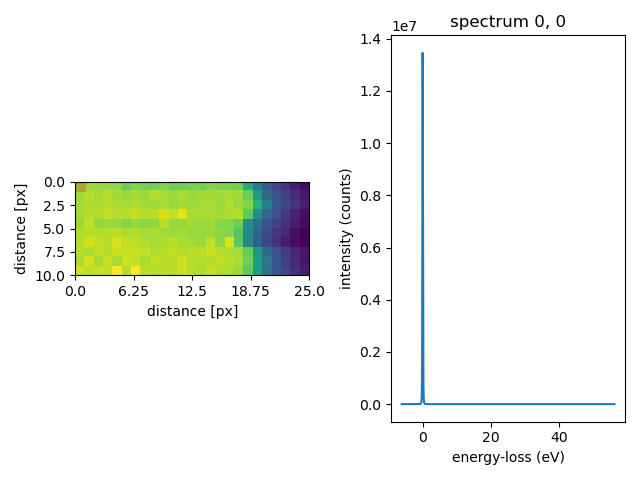

In [115]:
v = res.plot()

[ 6.67765731e-02  5.41174565e+03  2.09773567e-01 -5.03759089e-02
  4.60116290e+03  1.76471738e-01]
[ 6.40790854e-02  5.42690876e+03  1.95865661e-01 -5.43761627e-02
  4.89364258e+03  1.77493041e-01]
[ 6.81077719e-02  6.43605514e+03  1.95012100e-01 -5.30016379e-02
  4.43884015e+03  1.66523164e-01]
[ 6.64093078e-02  5.75427504e+03  1.97398452e-01 -5.44820718e-02
  4.76615072e+03  1.74423078e-01]
[ 6.60569720e-02  5.51845692e+03  1.96624862e-01 -5.43996081e-02
  4.90618330e+03  1.73954089e-01]
[ 6.88292998e-02  5.83932800e+03  2.00135178e-01 -5.42389948e-02
  4.77339641e+03  1.73471449e-01]
[ 6.88602553e-02  6.40214431e+03  1.98363423e-01 -5.58406094e-02
  4.40044152e+03  1.74087986e-01]
[ 6.85837537e-02  5.50451130e+03  2.04716106e-01 -5.38545064e-02
  4.91184340e+03  1.76830016e-01]
[ 6.80843999e-02  5.92034916e+03  1.98310795e-01 -5.36603097e-02
  4.72749111e+03  1.71696664e-01]
[ 7.02924129e-02  5.79923590e+03  2.03052815e-01 -6.00875377e-02
  4.77021463e+03  1.85617368e-01]
[ 7.593519

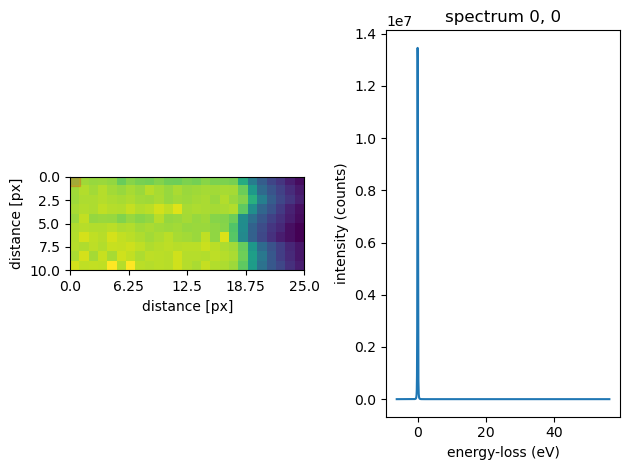

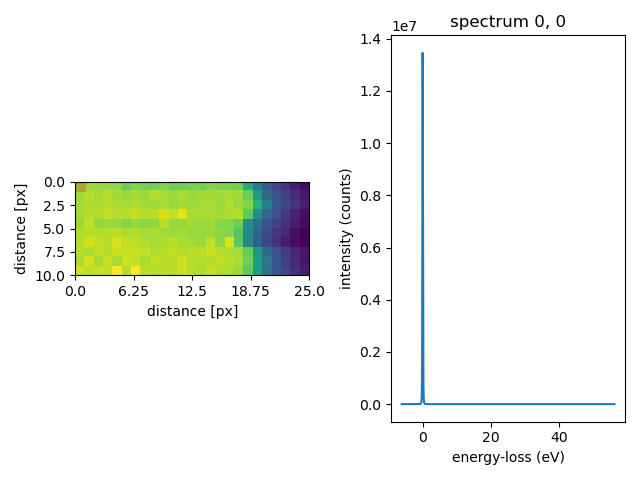

In [ ]:
par = np.array(res.metadata['zero_loss']['fit_parameter'])

for x in range(par.shape[0]):
    for y in range(par.shape[1]):
        res[x,y] = eels_tools.zl_func(res.energy_loss, *par[x,y])
res.plot()

In [56]:
for dset in infoWidget.datasets.values():
    if isinstance(dset, sidpy.Dataset):
        if 'Measurement' in dset.title:
            dset.title = dset.title.split('/')[-1]

            print(dset.title)


In [5]:
infoWidget.low_loss.get_drude()

In [22]:
print(infoWidget.datasets.keys())
dat ={ 'Channel_000': infoWidget.datasets['Channel_000'], 
       '_relationship': infoWidget.datasets['_relationship'],
       'plasmon': infoWidget.datasets['plasmon']}

dict_keys(['Channel_000', '_relationship', 'shifted_low_loss', 'zero_loss', 'plasmon', 'low_loss_model'])


In [14]:
infoWidget.datasets['plasmon'].metadata['zero_loss'].keys()

dict_keys(['shifted', 'parameter', 'startFitEnergy', 'endFitEnergy', 'fit_parameter', 'original_low_loss', (0, 0), (20, 6), '0,0', '0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9', '1,0', '1,1', '1,2', '1,3', '1,4', '1,5', '1,6', '1,7', '1,8', '1,9', '2,0', '2,1', '2,2', '2,3', '2,4', '2,5', '2,6', '2,7', '2,8', '2,9', '3,0', '3,1', '3,2', '3,3', '3,4', '3,5', '3,6', '3,7', '3,8', '3,9', '4,0', '4,1', '4,2', '4,3', '4,4', '4,5', '4,6', '4,7', '4,8', '4,9', '5,0', '5,1', '5,2', '5,3', '5,4', '5,5', '5,6', '5,7', '5,8', '5,9', '6,0', '6,1', '6,2', '6,3', '6,4', '6,5', '6,6', '6,7', '6,8', '6,9', '7,0', '7,1', '7,2', '7,3', '7,4', '7,5', '7,6', '7,7', '7,8', '7,9', '8,0', '8,1', '8,2', '8,3', '8,4', '8,5', '8,6', '8,7', '8,8', '8,9', '9,0', '9,1', '9,2', '9,3', '9,4', '9,5', '9,6', '9,7', '9,8', '9,9', '10,0', '10,1', '10,2', '10,3', '10,4', '10,5', '10,6', '10,7', '10,8', '10,9', '11,0', '11,1', '11,2', '11,3', '11,4', '11,5', '11,6', '11,7', '11,8', '11,9', '12,0', '12,1', 

In [25]:
g =pyTEMlib.file_tools.save_dataset(infoWidget.datasets, '11_si.hf5')


Cannot overwrite file. Using:  11_si-1.hf5


c:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:11-eels to 11_eels
  warn('main_data_name should not contain the "-" character. Reformatted'
c:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
c:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:11-eels_new to 11_eels_new
  warn('main_data_name should not contain the "-" character. Reformatted'
c:\Users\gduscher\Documents\Github\pyTEMlib\notebooks\Spectroscopy\../../../sidpy\sidpy\hdf\hdf_utils.py:387: UserWarning: Converted key: (0, 0) from type: <class 'tuple'> to str
  warn('Converted key: {} from type: {} to str'
c:\Use

In [29]:
g.file.close()
dir(g)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir

In [65]:
infoWidget.datasets[infoWidget.datasets['_relationship']['low_loss']].metadata


{'experiment': {'single_exposure_time': 0.1,
  'number_of_frames': 1,
  'collection_angle': 100.0,
  'convergence_angle': 0.0,
  'exposure_time': 0.1,
  'microscope': '',
  'acceleration_voltage': 199990.28125,
  'flux_ppm': 90.36209375,
  'count_conversion': 1,
  'beam_current': 0},
 'annotations': {'0': {'type': 'spectral_image',
   'label': '1',
   'width': 0.004483174532651901,
   'height': 0.04483174532651901,
   'position': [0.07173079252243042, 0.0],
   'Rectangle': array([ 0., 16., 10., 17.])}},
 'zero_loss': {'shifted': array([[-0.17133928, -0.20872347, -0.15697378, -0.22911345, -0.41304692,
          -0.27802566, -0.28852486, -0.19660906, -0.24778839, -0.29709778],
         [-0.17452395, -0.25264281, -0.19338031, -0.22475387, -0.3867537 ,
          -0.26830998, -0.30173948, -0.18973434, -0.24055065, -0.27581737],
         [-0.18777319, -0.21813711, -0.23541803, -0.25136158, -0.37223943,
          -0.28151478, -0.27689985, -0.20720506, -0.20844662, -0.26624501],
         [-0.1

In [20]:
infoWidget.low_loss.get_multiple_scattering()

KeyboardInterrupt: 

In [20]:
infoWidget.low_loss.do_all()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9


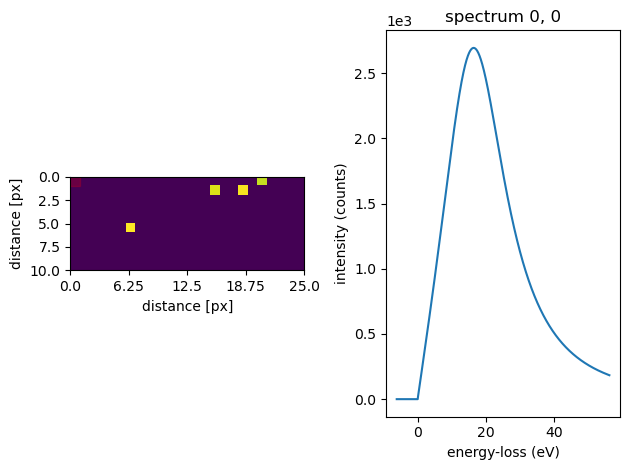

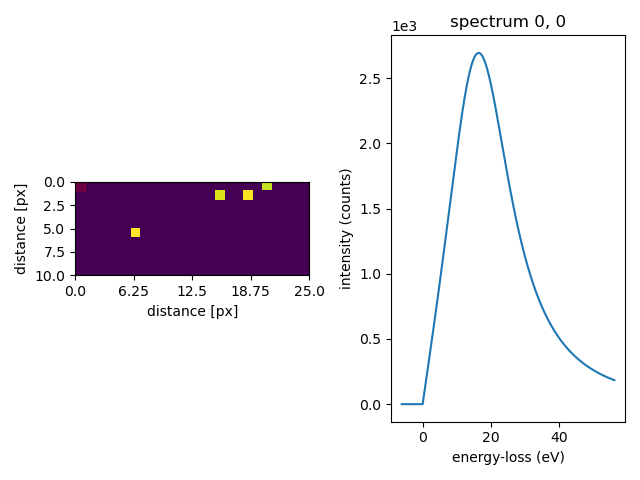

In [51]:
infoWidget.datasets['low_loss_model'].plot()

In [72]:
infoWidget

sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<mul, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'annotations', 'zero_loss']

13-without blue laser 10% (2048,)
EELS Acquire (2048,)
13-with laser (2048,)


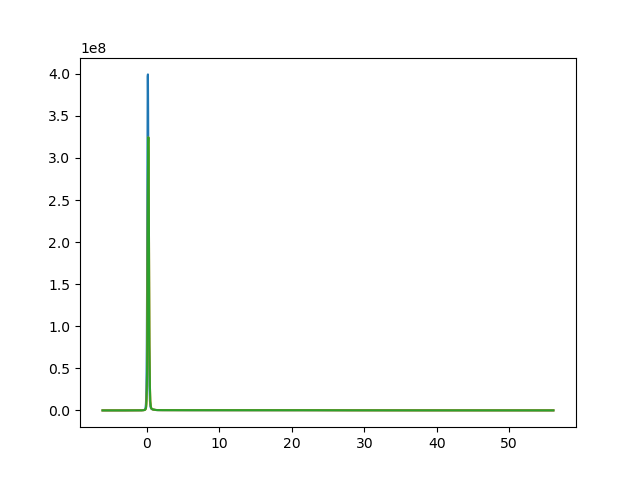

In [38]:
plt.figure()
for key, dset in infoWidget.datasets.items():
    if key[0] != '_': 
        print(dset.title, dset.shape)
        plt.plot(dset.energy_loss, dset)


In [39]:
plt.close('all')

In [29]:
class EELSWidget2(pyTEMlib.info_widget.EELSBaseWidget):
    def __init__(self, datasets=None):
        
        super().__init__(datasets, sidebar=None)
        super().set_dataset()
infoWidget.low_loss.update_ll_sidebar()

Channel_000 None 0
Channel_000 None 0


In [37]:
infoWidget.datasets['Channel_002'].original_metadata

{'ImageData': {'Calibrations': {'Brightness': {'Origin': 0.0,
    'Scale': 1.0,
    'Units': ''},
   'Dimension': {'0': {'Origin': 0.0,
     'Scale': 0.1487438678741455,
     'Units': 'nm'},
    '1': {'Origin': 0.0, 'Scale': 0.1487438678741455, 'Units': 'nm'}},
   'DisplayCalibratedUnits': 1},
  'Data': 'read',
  'DataType': 11,
  'Dimensions': {'0': 1024, '1': 1024},
  'PixelDepth': 4},
 'ImageTags': {'DataBar': {'Acquisition Date': '3/16/2023',
   'Acquisition Time': '1:23:37 PM',
   'Acquisition Time (OS)': 1.3323461017764891e+17,
   'Custom elements': {},
   'Device Name': 'DigiScan',
   'Exposure Number': 3960478},
  'DigiScan': {'Bitshift': 0,
   'Channel': 0,
   'Flip': 0,
   'Flyback': 50.0,
   'Horizontal DS Offset': 0.0,
   'Horizontal Image Center': 512.0,
   'Horizontal Perpendicular Pixel Step': -16,
   'Horizontal Pixel Step': -16,
   'Horizontal Spacing': 22.4,
   'Integrate Frames': 0,
   'Integration Percentage': 80.0,
   'Number Summing Frames': 5.0,
   'Recorded': 1,

[884.0, 64.0, 960.0, 544.0]

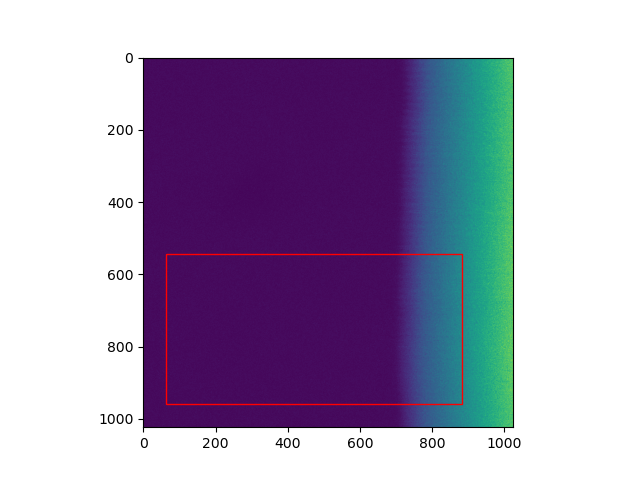

In [6]:
d = infoWidget.datasets['Channel_000'].original_metadata

rect = d['DocumentObjectList']['0']['AnnotationGroupList']['2']['Rectangle']
import matplotlib.patches
plt.figure()
plt.imshow(infoWidget.datasets['Channel_000'].T)
kwargs={'edgecolor': 'red', 'facecolor': 'None'}
r = matplotlib.patches.Rectangle([rect[0], rect[2]], rect[1]-rect[0], rect[3]-rect[2], **kwargs)
plt.gca().add_artist(r)
rect

{'image_type': 'survey image',
 'experiment': {'microscope': '', 'acceleration_voltage': 199990.28125},
 'annotations': {}}

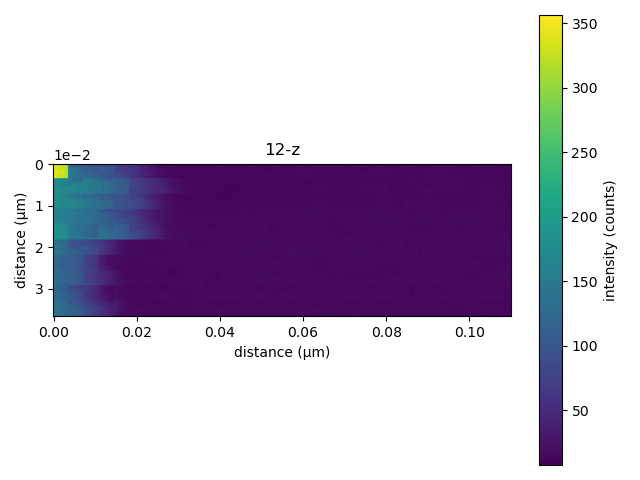

In [110]:


def read_annotation(image):
    scale_x = np.abs(image.x[1]-image.x[0])
    scale_y = np.abs(image.y[1]-image.y[0])
    rec_scale = np.array([scale_x, scale_y,scale_x, scale_y])
    if 'DocumentObjectList' not in image.original_metadata:
        return {}
    if '0' not in image.original_metadata['DocumentObjectList']:
        return {}
    annotations = {}        
    tags = image.original_metadata['DocumentObjectList']['0']     
    for key in tags:
        if 'AnnotationGroupList' in key:
            an_tags = tags[key]
            for key2 in an_tags:
                if isinstance(an_tags[key2], dict):
                    if an_tags[key2]['AnnotationType'] == 13:  #type 'text'
                        annotations[key2] = {'type': 'text'}
                        if 'Label' in an_tags:
                            annotations[key2]['label'] = an_tags['Label']
                        rect = np.array(an_tags[key2]['Rectangle']) * rec_scale
                        annotations[key2]['position'] = [rect[1],rect[0]]
                        annotations[key2]['text'] = an_tags['Text'] 
                        
                    elif an_tags[key2]['AnnotationType']==6:
                        annotations[key2] = {'type': 'circle'}
                        if 'Label' in an_tags:
                            annotations[key2]['label'] = an_tags['Label']
                        rect = np.array(an_tags[key2]['Rectangle']) * rec_scale
                    
                        annotations[key2]['radius'] =rect[3]-rect[1]
                        annotations[key2]['position'] = [rect[1],rect[0]]
        
                    elif an_tags[key2]['AnnotationType'] == 23:
                        print('1')
                        annotations[key2] = {'type':  'spectral_image'}
                        if 'Label' in an_tags[key2]:
                            annotations[key2]['label'] = an_tags[key2]['Label']
                        rect = np.array(an_tags[key2]['Rectangle']) * rec_scale
                        
                        annotations[key2]['width'] =rect[3]-rect[1]
                        annotations[key2]['height'] =rect[2]-rect[0]
                        annotations[key2]['position'] = [rect[1],rect[0]]
                        annotations[key2]['Rectangle'] = np.array(an_tags[key2]['Rectangle'])
            
    image.metadata['annotations'] = annotations                
    return annotations


dset = infoWidget.datasets['Channel_001']
read_annotation(dset)


dset.plot()
if 'annotations' in dset.metadata:
    annotations = dset.metadata['annotations']
    for key in annotations:
        if annotations[key]['type'] == 'spectral_image':
            kwargs={'edgecolor': 'red', 'facecolor': 'None'}
        
            r = matplotlib.patches.Rectangle(annotations[key]['position'], annotations[key]['width'], annotations[key]['height'], **kwargs)
            plt.gca().text(annotations[key]['position'][0], annotations[key]['position'][1], annotations[key]['label'], color='r')
            plt.gca().add_artist(r)
dset.metadata

{'AnnotationType': 23,
 'BackgroundColor': [-1, -1, -1],
 'BackgroundMode': 2,
 'Color': [-258, 0, 0],
 'FillMode': 2,
 'ForegroundColor': [0, -1, 0],
 'HasBackground': 0,
 'IsDeletable': 1,
 'IsMoveable': 1,
 'IsResizable': 1,
 'IsSelectable': 1,
 'IsTranslatable': 1,
 'IsVisible': 1,
 'IsVolatile': 0,
 'Label': '1',
 'Name': 'SICursor',
 'ObjectTags': {},
 'Rectangle': [1.0, 26.0, 10.0, 27.0],
 'SelectionStyle': 1,
 'UniqueID': 13}

In [41]:
                
            if split_keys[5] in ['AnnotationType','Text','Rectangle','Name', 'Label']:
            
        tags['annotations'] = {}
        for key in annotations:
            if annotations[key]['AnnotationType']==13: 
                if 'Label' in annotations[key]:
                    tags['annotations']['annotations_'+str(key)+'_label'] = annotations[key]['Label']
                tags['annotations']['annotations_'+str(key)+'_type'] = 'text'
                rect = np.array(annotations[key]['Rectangle'])* rec_scale
                tags['annotations']['annotations_'+str(key)+'_x'] = rect[1]
                tags['annotations']['annotations_'+str(key)+'_y'] = rect[0]
                tags['annotations']['annotations_'+str(key)+'_text'] = annotations[key]['Text']
                
            elif annotations[key]['AnnotationType']==6:
                #out_tags['annotations'][key] = {}
                if 'Label' in annotations[key]:
                    tags['annotations']['annotations_'+str(key)+'_label'] = annotations[key]['Label']
                tags['annotations']['annotations_'+str(key)+'_type'] = 'circle'
                rect = np.array(annotations[key]['Rectangle'])* rec_scale
                
                tags['annotations']['annotations_'+str(key)+'_radius'] =rect[3]-rect[1]
                tags['annotations']['annotations_'+str(key)+'_position'] = [rect[1],rect[0]]
                
            elif annotations[key]['AnnotationType']==6:
                #out_tags['annotations'][key] = {}
                if 'Label' in annotations[key]:
                    tags['annotations']['annotations_'+str(key)+'_label'] = annotations[key]['Label']
                tags['annotations']['annotations_'+str(key)+'_type'] = 'circle'
                rect = np.array(annotations[key]['Rectangle'])* rec_scale
                
                tags['annotations']['annotations_'+str(key)+'_radius'] =rect[3]-rect[1]
                tags['annotations']['annotations_'+str(key)+'_position'] = [rect[1],rect[0]]

                

            elif annotations[key]['AnnotationType']==23:
                if 'Name' in annotations[key]:
                    if annotations[key]['Name'] == 'Spectrum Image':
                        #tags['annotations'][key] = {}
                        if 'Label' in annotations[key]:
                            tags['annotations']['annotations_'+str(key)+'_label'] = annotations[key]['Label']
                        tags['annotations']['annotations_'+str(key)+'_type'] = 'spectrum image'
                        rect = np.array(annotations[key]['Rectangle'])* rec_scale
                        
                        tags['annotations']['annotations_'+str(key)+'_width'] =rect[3]-rect[1]
                        tags['annotations']['annotations_'+str(key)+'_height'] =rect[2]-rect[0]
                        tags['annotations']['annotations_'+str(key)+'_position'] = [rect[1],rect[0]]
   

IndentationError: expected an indented block after 'for' statement on line 4 (3538655079.py, line 5)

In [20]:
infoWidget.tab_buttons.index = 2

infoWidget.low_loss.update_ll_sidebar()


AttributeError: 'EELSWidget' object has no attribute 'tab_buttons'

In [121]:
infoWidget.tabval = 2
infoWidget.tab_activated()

In [46]:
import ipywidgets
infoWidget.tab.children = [infoWidget.tab_buttons, infoWidget.children[infoWidget.tab_buttons.index]]

In [56]:
infoWidget.info.update_dataset()

In [38]:
infoWidget.low_loss._update()

In [41]:
infoWidget.datasets['plasmon'].metadata

{'experiment': {'single_exposure_time': 0.1,
  'exposure_time': 10.0,
  'number_of_frames': 100,
  'collection_angle': 100.0,
  'convergence_angle': 0.0,
  'microscope': 'Libra 200 MC',
  'acceleration_voltage': 199990.28125,
  'flux_ppm': 4875.3037109375,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([-0.14012023]),
  'startFitEnergy': -0.5,
  'endFitEnergy': 0.5,
  'fit_parameter': array([ 3.38795373e-02,  2.04002455e+04,  2.93662064e-01, -1.63207014e-02,
          2.28877644e+04,  1.92327898e-01]),
  'original_low_loss': 'Squeezed_EELS90muOAonaxis3_new_new'},
 'plasmon': {'parameter': array([1.50324046e+01, 7.46074698e-01, 7.41146395e+08]),
  'epsilon': array([0.00000000e+00       +0.j        ,
         0.00000000e+00       +0.j        ,
         0.00000000e+00       +0.j        , ...,
         6.23143817e+08+21041344.40887087j,
         6.23269871e+08+21023350.85181732j,
         6.23395723e+08+21005387.31173421j])}}

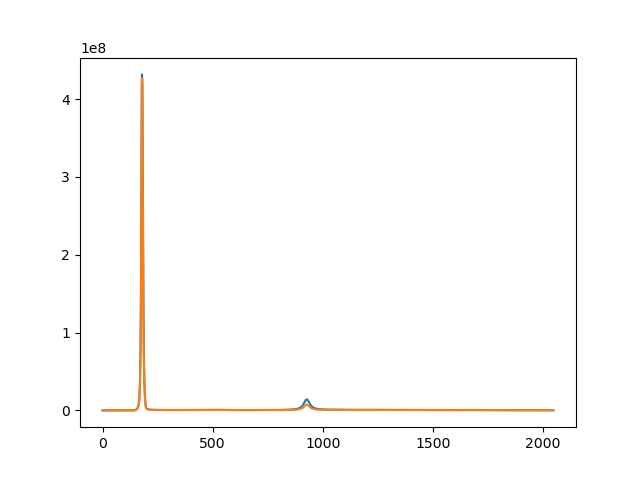

In [14]:
an, p = eels_tools.angle_correction(infoWidget.dataset)

plt.figure()
plt.plot(infoWidget.dataset/(an/an.max()))

plt.plot(infoWidget.dataset)

[1.60512722e+01 1.76590538e+00 3.48812177e+05 1.70000000e-01]


{'experiment': {'single_exposure_time': 0.1,
  'exposure_time': 10.0,
  'number_of_frames': 100,
  'collection_angle': 100.0,
  'convergence_angle': 0.0,
  'microscope': 'Libra 200 MC',
  'acceleration_voltage': 199990.28125,
  'flux_ppm': 4875.3037109375,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([-0.14012023]),
  'startFitEnergy': -0.5,
  'endFitEnergy': 0.5,
  'fit_parameter': array([ 3.38795373e-02,  2.04002455e+04,  2.93662064e-01, -1.63207014e-02,
          2.28877644e+04,  1.92327898e-01]),
  'original_low_loss': 'EELS90muOAonaxis3_new_new'},
 'multiple_scattering': {'parameter': array([1.50313404e+01, 7.54438111e-01, 3.50839049e+05, 2.38991855e-01])}}

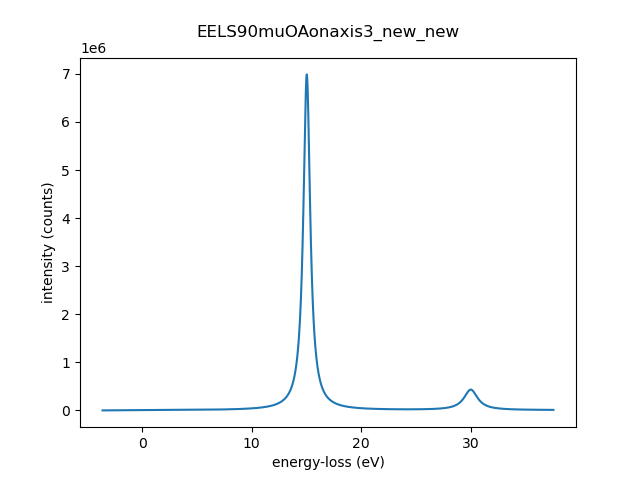

In [266]:
pin = infoWidget.datasets['plasmon'].metadata['plasmon']['parameter']
pin = np.append(pin, [0.17])
print(pin)

c = eels_tools.fit_multiple_scattering(infoWidget.dataset, 5, 40, pin)
c.plot()
c.metadata

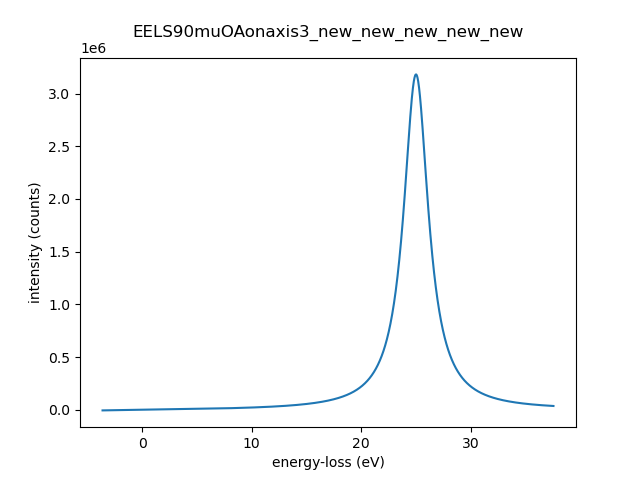

In [249]:

v = infoWidget.datasets['plasmon'].plot()


In [206]:
def energy_loss_function(energy_scale: np.ndarray, p: np.ndarray) -> np.ndarray:
    eps = 1 - p[0]**2/(energy_scale**2+p[1]**2) + 1j * p[1] * p[0]**2/energy_scale/(energy_scale**2+p[1]**2)
    elf = (-1/eps).imag
    return elf*p[2]

def multiple_scattering(energy_scale: np.ndarray, p: list, core_loss=False)-> np.ndarray:
    p = np.abs(p)
    tmfp = p[3]
    if core_loss:
        dif = 1
    else:
        dif = 16
    LLene = np.linspace(1, 2048-1,2048)/dif
    
    SSD = energy_loss_function(LLene, p)
    ssd  = np.fft.fft(SSD)
    ssd2 = ssd.copy()
    
    ### sum contribution from each order of scattering:
    PSD = np.zeros(len(LLene))
    for order in range(15):
        # This order convoluted spectum 
        # convoluted SSD is SSD2
        SSD2 = np.fft.ifft(ssd).real
    
        # scale right (could be done better? GERD) 
        # And add this order to final spectrum
        PSD += SSD2*abs(sum(SSD)/sum(SSD2)) / scipy.special.factorial(order+1)*np.power(tmfp, (order+1))*np.exp(-tmfp) #using equation 4.1 of egerton ed2
        
        # next order convolution
        ssd = ssd * ssd2
    
    PSD /=tmfp*np.exp(-tmfp)
    BGDcoef = scipy.interpolate.splrep(LLene, PSD, s=0)    
    return scipy.interpolate.splev(energy_scale, BGDcoef)


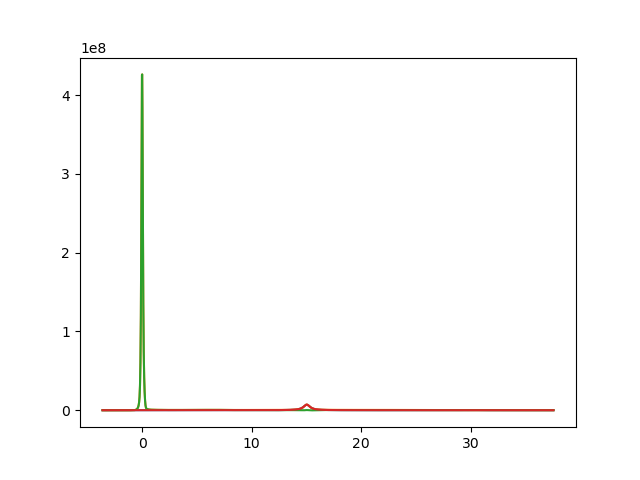

In [207]:
tmfp = .17  #p[3]
p0 =[1.50312722e+01, 7.45905380e-01, 3.48811157e+05, tmfp]
x = infoWidget.dataset.energy_loss

cts = multiple_scattering(x, p0, core_loss=False)
plt.figure()
plt.plot(x,cts)
plt.plot(x, infoWidget.dataset)
plt.plot(x, infoWidget.dataset-cts)
plt.plot(x, infoWidget.datasets['plasmon'])



In [213]:
multiple_scattering(energy_scale, p)


def errf_multi(p, y, x):
    elf = multiple_scattering(x, p)
    err = y - elf
    #print (p,sum(np.abs(err)))
    return np.abs(err) # /np.sqrt(y)


pin2 = np.array([9,1,.7, 1.11])
E = energy_scale = infoWidget.dataset.energy_loss
startFit =np.argmin(abs(energy_scale-6))
endFit = np.argmin(abs(energy_scale-35))
    
p2, lsq = leastsq(errf_multi, p0, args=(infoWidget.dataset[startFit:endFit], energy_scale[startFit:endFit]), maxfev=2000)


(array([1.50313215e+01, 7.53493487e-01, 3.50578991e+05, 2.37203551e-01]),
 [15.0312722, 0.74590538, 348811.157, 0.17])

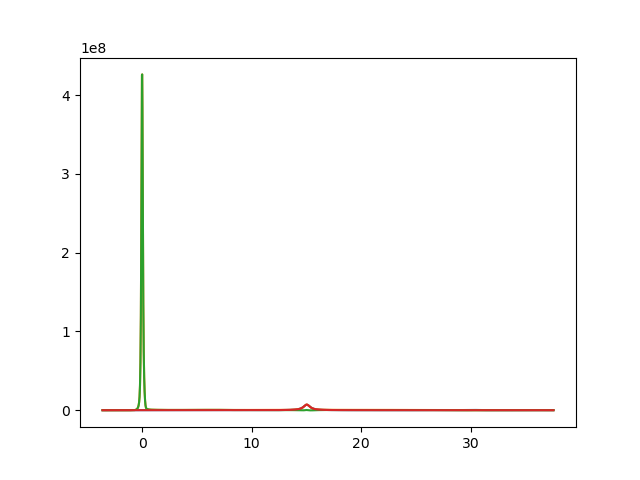

In [214]:

cts = multiple_scattering(x, p2, core_loss=False)
plt.figure()
plt.plot(x,cts)
plt.plot(x, infoWidget.dataset)
plt.plot(x, infoWidget.dataset-cts)
plt.plot(x, infoWidget.datasets['plasmon'])

p2, p0


In [ ]:
tags = {}
tags['dispersion'] = spec.energy_loss.slope
tags['E0'] = 200 # tags['E0']#input('incident energy E0(kev) : ');
tags['collAngle'] = 30 # tags['collAngle']


def Drude( tags, e, p):
    return drude(tags,  e, p[0], p[1], p[2],  p[3])
def drude(tags, e, ep, ew, tnm, eb):
    pc = tags['dispersion']#input('ev per channel : ');
    e0 = tags['E0']#input('incident energy E0(kev) : ');
    beta = tags['collAngle']#input('collection semiangle beta(mrad) : ');
    #tnm = input('thickness(nm) : ');

    b = beta/1000.0 # %rad
    T = 1000.0*e0*(1.+e0/1022.12)/(1.0+e0/511.06)**2;# %eV # equ.5.2a or Appendix E p 427 
    tgt = 1000*e0*(1022.12 + e0)/(511.06 + e0);# %eV  Appendix E p 427 
    rk0 = 2590*(1.0+e0/511.06)*np.sqrt(2.0*T/511060);
    os = e[0]
    ewMod = eb

    eps = 1 - (ep**2-ewMod*e*1j)/(e**2+2*e*ew*1j) #Mod Drude term
    
    eps[np.nonzero(eps==0.0)]= 1e-19
    elf = np.imag(-1/eps)

    the = e/tgt; #% varies with energy loss! # Appendix E p 427 
    
    srfelf=np.imag(-4./(1.0+eps))-elf; #% for 2 surfaces
    angdep = np.arctan(b/the)/the - b/(b*b+the*the);
    srfint = angdep*srfelf/(3.1416*0.05292*rk0*T); #% probability per eV
    anglog = np.log(1.0+ b*b/the/the);
    # I0 = tags['spec'].sum()#*self.tags['counts2e']
    #print('counts2e',1/self.tags['counts2e'])
    

    # 2 * T = m_0 v**2 !!!  a_0 = 0.05292 nm
    volint = abs(tnm/(np.pi*0.05292*T*2.0)*elf*anglog); #S equ 4.26% probability per eV
    #volint = volint *I0/ epc #S probability per channel
    ssd = volint #+ srfint;

    if os <-1.0:
        xs = int(abs(-os/epc))
   
        ssd[0:xs]=0.0
        volint[0:xs]=0.0
        srfint[0:xs]=0.0
        
        #if os <0:
        Ps = np.trapz(e,srfint); #% 2 surfaces but includes negative begrenzungs contribn.
        Pv = abs(np.trapz(e,abs(volint/self.tags['spec'].sum()))); #% integrated volume probability
        Pv = (volint/I0).sum() ## our data have he same epc and the trapz formula does not include 
        lam = tnm/Pv; #% does NOT depend on free-electron approximation (no damping). 
        lamfe = 4.0*0.05292*T/ep/np.log(1+(b* tgt / ep) **2); #% Eq.(3.44) approximation
    
        #print('Ps(2surfaces+begrenzung terms) =', Ps, 'Pv=t/lambda(beta)= ',Pv,'\n');
        #print('Volume-plasmon MFP(nm) = ', lam,' Free-electron MFP(nm) = ',lamfe,'\n');
        #print('--------------------------------\n');

        """self.tags['eps'] = eps
        
        self.tags['lam'] = lam
        self.tags['lamfe'] = lamfe
        self.tags['Pv'] = Pv
        """
        
    return ssd#/np.pi
    



NameError: name 'spec' is not defined

In [ ]:
def newDrudeBgd(energy_scale,p):
        tags = self.tags

        startB = energy_scale[0]
        endB = energy_scale[-1]
        p = np.abs(p)
       

        LLene = np.linspace(0, 2047,2048)
        SSD =  drude(LLene,p)
        ssd  = np.fft.fft(SSD)

        ssd2 = ssd.copy()
        SSD2 = SSD.copy()
        
        ### sum contribution from each order of scattering:
        PSD = np.zeros(len(LLene))
        for order in range(15):
            # This order convoluted spectum 
            PPSD = np.zeros(len(LLene))
            # convoluted SSD is SSD2
            SSD2 = np.fft.ifft(ssd).real
            
            # scale right (could be done better? GERD) 
            mult = sum(SSD)/sum(SSD2)
            SSD2 *= abs(mult)
            
            PPSD = SSD2/factorial(order+1)*np.power(tmfp,(order+1))*np.exp(-tmfp) #using equation 4.1 of egerton ed2
           # Add this order to final spectrum
            PSD += PPSD

            # next order convolution
            ssd = ssd * ssd2
            

        cts = np.zeros(len(x))
        
        if startB < 0:
            startB = 0
        BGDcoef = splrep(LLene[int(startB):int(endB)],PSD[int(startB):int(endB)],s=0)


        lin = np.zeros(len(x))

        cts =splev( x, BGDcoef)*p[1]
        
        self.cor =  self.EffectiveAngle(self.tags['E0'],x, self.tags['convAngle'], self.tags['collAngle'])  
        return cts#*self.cor

In [ ]:
def drude_simulation(dset, e, ep, ew, tnm, eb):
    
    energy_scale = dset.get_spectral_dims(return_axis=True)[0]
    dispersion = energy_scale.slope # input('ev per channel : ');
    
    beta = dset.metadata['collection_angle'] / 1000.  # rad
    e0 = dset.metadata['acceleration_voltage'] / 1000.  # input('incident energy e0(kev) : ');

    # effective kinetic energy: T = m_o v^2/2,
    t = 1000.0 * e0 * (1. + e0 / 1022.12) / (1.0 + e0 / 511.06) ** 2  # eV # equ.5.2a or Appendix E p 427
    
    # 2 gamma T
    tgt = 1000 * e0 * (1022.12 + e0) / (511.06 + e0)  # eV  Appendix E p 427
    rk0 = 2590 * (1.0 + e0 / 511.06) * np.sqrt(2.0 * t / 511060)
    
    os = e[0]
    ew_mod = eb
    tags = dset.metadata
   
    eps = 1 - (ep ** 2 - ew_mod * e * 1j) / (e ** 2 + 2 * e * ew * 1j)  # Mod drude term
    
    eps[np.nonzero(eps == 0.0)] = 1e-19
    elf = np.imag(-1 / eps)

    the = e / tgt  # varies with energy loss! # Appendix E p 427
    # srfelf = 4..*eps2./((1+eps1).^2+eps2.^2) - elf; %equivalent
    srfelf = np.imag(-4. / (1.0 + eps)) - elf  # for 2 surfaces
    angdep = np.arctan(beta / the) / the -  beta/ (beta * beta + the * the)
    srfint = angdep * srfelf / (3.1416 * 0.05292 * rk0 * t)  # probability per eV
    anglog = np.log(1.0 + beta * beta / the / the)
    i0 = dset.sum()  # *tags['counts2e']

    # 2 * t = m_0 v**2 !!!  a_0 = 0.05292 nm
    volint = abs(tnm / (np.pi * 0.05292 * t * 2.0) * elf * anglog)  # S equ 4.26% probability per eV
    volint = volint * i0 / dispersion  # S probability per channel
    ssd = volint  # + srfint;

    if e[0] < -1.0:
        xs = int(abs(-e[0] / dispersion))

        ssd[0:xs] = 0.0
        volint[0:xs] = 0.0
        srfint[0:xs] = 0.0

        # if os <0:
        p_s = np.trapz(e, srfint)  # 2 surfaces but includes negative Begrenzung contribution.
        p_v = abs(np.trapz(e, abs(volint / tags['spec'].sum())))  # integrated volume probability
        p_v = (volint / i0).sum()  # our data have he same epc and the trapez formula does not include
        lam = tnm / p_v  # does NOT depend on free-electron approximation (no damping).
        lamfe = 4.0 * 0.05292 * t / ep / np.log(1 + (beta * tgt / ep) ** 2)  # Eq.(3.44) approximation

        tags['eps'] = eps
        tags['lam'] = lam
        tags['lamfe'] = lamfe
        tags['p_v'] = p_v

    return ssd  # /np.pi

In [4]:
peak_model, p = pyTEMlib.eels_tools.gaussian_mixture_model(spectrum1, p_in=None)

print(int(len(p)/3))


NameError: name 'spectrum1' is not defined

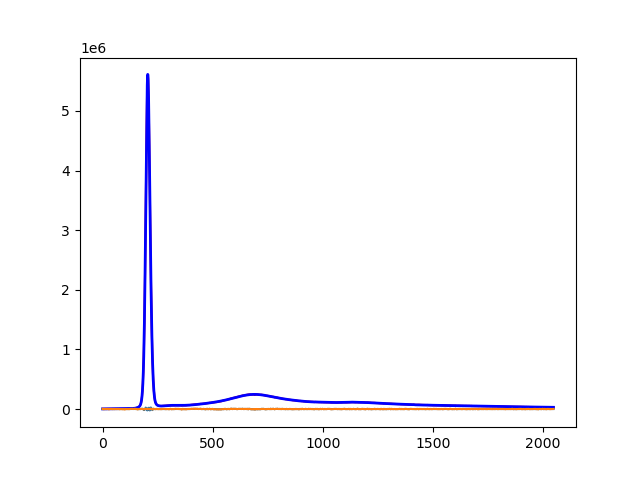

In [20]:


spectrum = spectrum1.view.get_spectrum()
plt.figure()

plt.plot(spectrum, c='red')
plt.plot(peak_model, linewidth=2,c='blue')
plt.plot(spectrum-peak_model)
plt.plot((spectrum-peak_model)/np.sqrt(spectrum/20)*100)

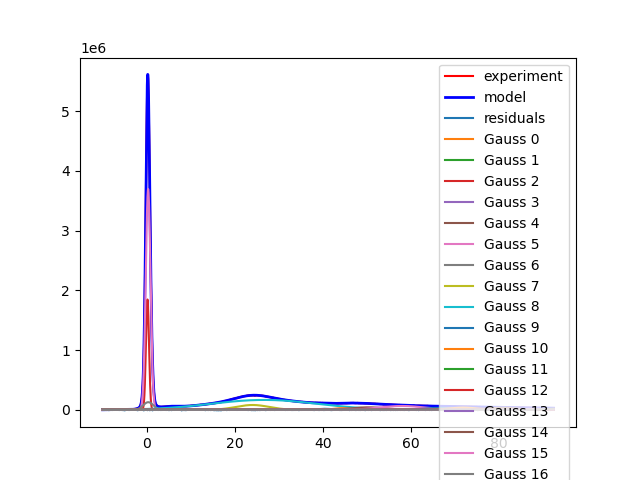

In [22]:
plt.figure()

plt.plot(spectrum.energy_loss, spectrum, c='r', label='experiment')
plt.plot(spectrum.energy_loss, peak_model, c='b',linewidth=2, label='model')
plt.plot(spectrum.energy_loss, (spectrum-peak_model)/np.sqrt(spectrum/20)*100, label='residuals')
for i in range(int(len(p)/3)):
    plt.plot(spectrum.energy_loss, pyTEMlib.eels_tools.gauss(spectrum.energy_loss, p[i*3:(i+1)*3]), label=f'Gauss {i}')

plt.legend(loc='upper right')

## peakfit

In [57]:
from pyTEMlib import peak_dialog

peakFitWidget = peak_dialog.PeakFitWidget(infoWidget.datasets, infoWidget.datasets['_relationship']['low_loss'])

AppLayout(children=(GridspecLayout(children=(Button(description='Fit Area', layout=Layout(grid_area='widget001…

In [63]:
infoWidget.datasets['_relationship']

{'main_dataset': 'Channel_000',
 'low_loss': 'Channel_000',
 'resolution_functions': 'resolution_functions'}

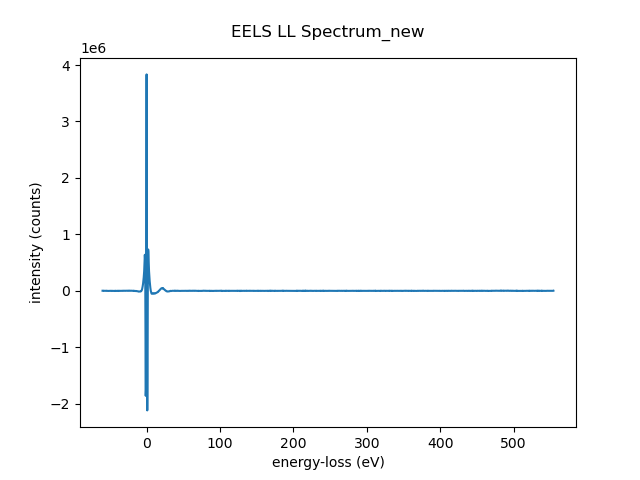

In [47]:
k = peakFitWidget.dataset-np.array(peakFitWidget.model)
v =k.plot()

In [62]:
peakFitWidget.smooth()

C:\Users\gduscher\Documents\Github\pyTEMlib\notebooks\Spectroscopy\../..\pyTEMlib\eels_tools.py:1829: RuntimeWarning: Number of calls to function has reached maxfev = 10000.
  [p, _] = leastsq(residuals3, pin, args=(x, y),maxfev = 10000)


In [59]:
peakFitWidget.datasets.keys()

dict_keys(['Channel_000', 'Channel_001', '_relationship', 'resolution_functions'])

In [ ]:
peakFitWidget.fit_peaks()

C:\Users\gduscher\Documents\Github\pyTEMlib\notebooks\Spectroscopy\../..\pyTEMlib\peak_dialog.py:357: RuntimeWarning: Number of calls to function has reached maxfev = 11000.
  #self.model[start_channel:end_channel] = model
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [ ]:
ff = eels_tools.gmm(energy_scale, np.array(peakFitWidget.peak_out_list).flatten())
plt.figure()
plt.plot(ff)
#peakFitWidget.dataset.plot()

np.isnan(ff).sum(), np.isinf(ff).sum()

In [75]:
peakFitWidget.peak_out_list = peak_model

In [23]:
plt.close('all')

In [12]:
for index, peak in peakFitWidget.peaks['peaks'].items(): # ll
    p = [peak['position'], peak['amplitude'], peak['width']]
    print(p)
    additional_spectra[f'peak {index}']= eels_tools.gauss(np.array(peakFitWidget.energy_scale), p)

[0.25, 5595090.5, 4.747764687329006]


TypeError: can't unbox heterogeneous list: float64 != float32

(2048,)
[-4.83000000e+01  3.83246094e+03  2.80766823e+00 -2.13000000e+01
  3.34756055e+03  2.50309866e+00 -1.36424205e-11  6.00148960e+07
  1.69709218e+00  1.98000000e+01  2.50729328e+05  1.09172481e+01
  8.07000000e+01  1.41388223e+04  6.03046268e+00  9.21000000e+01
  1.34123496e+04  1.58681033e+00  1.15500000e+02  9.99801367e+03
  1.67314163e+00  1.28400000e+02  8.61218750e+03  6.05662983e+00
  1.63500000e+02  5.94440137e+03  1.55680767e+00  1.67100000e+02
  5.93256055e+03  1.67007282e+00  1.98600000e+02  4.87127148e+03
  1.65743531e+00  2.34600000e+02  3.18025830e+03  1.63774453e+00
  2.50500000e+02  3.69103735e+03  1.52271110e+00  2.55900000e+02
  3.20574658e+03  2.78972361e+00  2.67600000e+02  2.57806250e+03
  2.29663513e+00  2.81100000e+02  3.54892529e+03  1.66879714e+00
  3.07200000e+02  1.55079565e+03  1.95856399e+00  3.20400000e+02
  2.64509766e+03  1.79741244e+00  3.40800000e+02  2.07240796e+03
  2.33128935e+00  3.52500000e+02  2.45149805e+03  2.76355395e+00
  3.58500000e+02 

1847

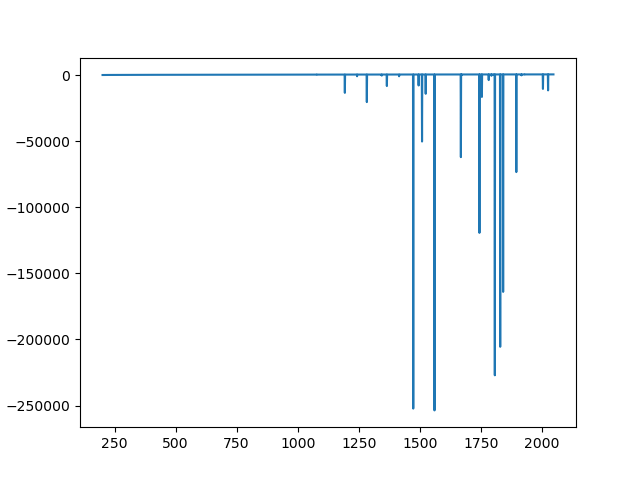

In [120]:
import scipy
spectrum = peakFitWidget.dataset

energy_scale = peakFitWidget.dataset.get_spectral_dims(return_axis=True)[0].values
pin = np.array(peakFitWidget.peak_out_list[:6]).flatten()
x = np.array(spectrum)
y = energy_scale


print(x.shape)
#p = scipy.optimize.least_squares(eels_tools.residuals3, pin, args=(x,y), method='lm', verbose= 2)
print(peak_model)
energy_scale[1]-energy_scale[0]

v = eels_tools.residuals3(pin, x, y)
plt.figure()
plt.plot(v)
np.isfinite(v).sum()

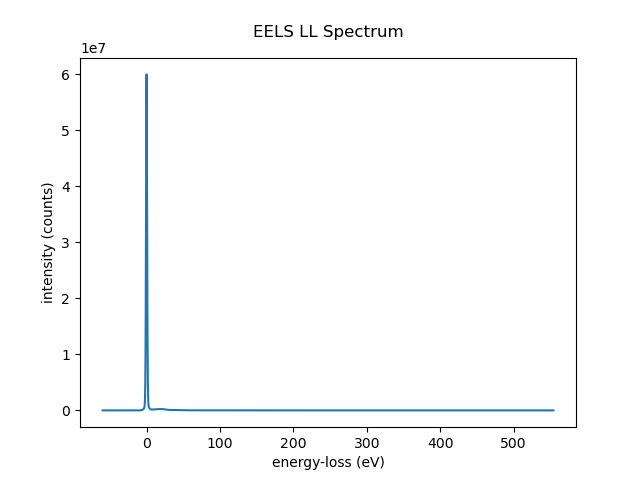

In [122]:
spectrum[spectrum<0]=10000
vv = spectrum.plot()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from eels_tools import find_peaks

# Assuming peakFitWidget.dataset is your spectrum data
# Example data, replace with your actual spectrum
spectrum = peakFitWidget.dataset
peaks = peakFitWidget.dataset.metadata['peak_fit']

# Fit the peaks using the find_peaks function
peak_model, peak_out_list = find_peaks(spectrum, peaks['fit_start'], peaks['fit_end'])

# Extract the peak positions and amplitudes
peak_positions = [peak['center'] for peak in peak_out_list]
peak_amplitudes = [peak['amplitude'] for peak in peak_out_list]

# Plot the original spectrum
x = np.arange(len(spectrum))
plt.plot(x, spectrum, label='Original Spectrum', color='gray', alpha=0.5)

# Plot the identified peaks
for pos, amp in zip(peak_positions, peak_amplitudes):
    plt.axvline(pos, color='red', linestyle=':', label=f'Peak at {pos:.2f}')
    plt.plot(pos, amp, 'ro')  # Mark the peak positions

plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.title('Identified Peaks in Spectrum')
plt.legend()
plt.show()

# Print the peak positions for verification
print("Identified peak positions:", peak_positions)

ModuleNotFoundError: No module named 'eels_tools'

In [48]:
peaks = peakFitWidget.dataset.metadata['peak_fit']

peak_model, peak_out_list = eels_tools.find_peaks(peakFitWidget.dataset,  peaks['fit_start'],  peaks['fit_end'])

C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [46]:
peakFitWidget.smooth()
peakFitWidget.peak_out_list

C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


array([], shape=(0, 3), dtype=float64)

In [ ]:
infoWidget.datasets['_relationship']

In [40]:
da = infoWidget.datasets[infoWidget.datasets['_relationship']['low_loss']]
gg = pyTEMlib.eels_tools.find_peaks(da, -4, 40)


C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
dir(da.view)

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [18]:
da = infoWidget.datasets[infoWidget.datasets['_relationship']['low_loss']]

print(da)
da.metadata['peak_fit']

sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<setitem, shape=(23, 28, 2048), dtype=float32, chunksize=(23, 28, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (µm) of size (23,)
y:  distance (µm) of size (28,)
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'peak_fit', 'zero_loss']


{'fit_start': -9.95,
 'fit_end': 92.30000000000001,
 'peaks': {'0': {'position': -9.95,
   'amplitude': 1000.0,
   'width': 1.0,
   'type': 'Gauss',
   'asymmetry': 0}}}

In [24]:
gg


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 5.60210700e+06, 0.00000000e+00, 3.38997724e+00,
        4.15490805e+04, 1.52867594e+00]))

In [29]:
shifts = pyTEMlib.eels_tools.get_zero_loss_energy(infoWidget.datasets['Channel_002'])


KeyboardInterrupt: 

In [1]:
import scipy
dataset = infoWidget.datasets['Channel_002']
spectrum = dataset.sum(axis=tuple(range(dataset.ndim - 1)))


NameError: name 'infoWidget' is not defined

In [27]:
import scipy
dataset = infoWidget.datasets['Channel_002']
spectrum = dataset.sum(axis=tuple(range(dataset.ndim - 1)))

startx = scipy.signal.find_peaks(spectrum/np.max(spectrum), height=0.98)[0][0]

end = startx + 3
start = startx - 3
for i in range(10):
    if spectrum[startx - i] < 0.3 * spectrum[startx]:
        start = startx - i
    if spectrum[startx + i] < 0.3 * spectrum[startx]:
        end = startx + i
if end - start < 7:
    end = startx + 4
    start = startx - 4


energy = dataset.get_spectral_dims(return_axis=True)[0].values

if dataset.ndim == 1:  # single spectrum
    _, shifts = pyTEMlib.eels_tools.get_channel_zero(np.array(dataset), energy, width)
    shifts = np.array([shifts])
elif dataset.ndim == 2:  # line scan
    shifts = np.zeros(dataset.shape[:1])
    for x in range(dataset.shape[0]):
        _, shifts[x] = pyTEMlib.eels_tools.get_channel_zero(dataset[x, :], energy, width)
elif dataset.ndim == 3:  # spectral image
    shifts = np.zeros(dataset.shape[:2])
    for x in range(dataset.shape[0]):
        for y in range(dataset.shape[1]):
            _, shifts[x, y] = pyTEMlib.eels_tools.get_channel_zero(dataset[x, y, :], energy, width)
shifts

210 202 8
4


array([[0.27885956, 0.27191713, 0.28913556, 0.25769037, 0.2942762 ,
        0.28620583, 0.33639917, 0.29324584, 0.23019431, 0.24396385,
        0.28630434, 0.34782575, 0.29164501, 0.32428319, 0.31925456,
        0.33853458, 0.34647511, 0.31610986, 0.38146446, 0.31699432,
        0.34575115, 0.35986766, 0.33364593, 0.33229606, 0.34956855,
        0.33242329, 0.3915634 , 0.35407163],
       [0.29500225, 0.2373293 , 0.25763805, 0.28486225, 0.31641727,
        0.29900238, 0.28421314, 0.27215118, 0.25969281, 0.23715325,
        0.3184073 , 0.29690798, 0.27968236, 0.32664399, 0.27429016,
        0.30321827, 0.33636393, 0.33146419, 0.37165488, 0.31699942,
        0.32685554, 0.37155651, 0.31661427, 0.34338988, 0.33284669,
        0.31143029, 0.41046077, 0.35855505],
       [0.29311011, 0.22077191, 0.3060771 , 0.27921994, 0.28125945,
        0.3067318 , 0.26348024, 0.25086256, 0.25962378, 0.2529393 ,
        0.31787102, 0.29516299, 0.28017314, 0.3592165 , 0.267943  ,
        0.30651435, 0.3383

In [10]:
dir(infoWidget.info.shift_low_loss)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [12]:
import uuid
import time

# Combine UUID and timestamp
unique_id = f"{uuid.uuid4()}_{int(time.time() * 1000)}"
print(unique_id)



8aef8a91-2b7f-4834-a33b-c2c0b88d3b77_1715976165623


In [75]:
infoWidget.core_loss.update_cl_dataset()

In [11]:
infoWidget.datasets['resolution_functions'].metadata

{'experiment': {'single_exposure_time': 0.01,
  'exposure_time': 0.21,
  'number_of_frames': 21,
  'collection_angle': 33.0,
  'convergence_angle': 30.0,
  'acceleration_voltage': 0.0,
  'flux_ppm': 115.68867492675781,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([1.0174319]),
  'startFitEnergy': -1.0,
  'endFitEnergy': 1.0,
  'fit_parameter': array([-1.51964411e-01,  5.09698919e+03,  1.33700815e+00,  2.38917861e-01,
          5.06085447e+03,  1.72056710e+00]),
  'original_low_loss': '1EELS Acquire (low-loss)_new'}}

In [57]:
infoWidget.datasets['Channel_000'].metadata

{'experiment': {'single_exposure_time': 3.0,
  'exposure_time': 63.0,
  'number_of_frames': 21,
  'collection_angle': 50.0,
  'convergence_angle': 30.0,
  'acceleration_voltage': 60000.0,
  'flux_ppm': 34706.602478027344,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([1.0174319])},
 'edges': {'fit_area': {'fit_start': 120.0, 'fit_end': 600.0},
  '0': {'z': 5,
   'symmetry': 'K1',
   'element': 'B',
   'onset': 188.0,
   'end_exclude': 238.0,
   'start_exclude': 185.0,
   'all_edges': {'K1': {'onset': 188.0}},
   'chemical_shift': 0.0,
   'areal_density': 1745395038619.995,
   'original_onset': 188.0,
   'data': array([5.66032845e-09, 5.61175423e-09, 5.56318001e-09, ...,
          1.68366704e-10, 1.68110794e-10, 1.67854883e-10]),
   'X_section_type': 'XRPA',
   'X_section_source': 'pyTEMlib'},
  '1': {'z': 7,
   'symmetry': 'K1',
   'element': 'N',
   'onset': 401.6,
   'end_exclude': 451.6,
   'start_exclude': 396.6,
   'all_edges': {'K1': {'onset': 401

In [54]:
plt.close('all')

In [60]:
infoWidget.spectrum


sidpy.Dataset of type SPECTRUM with:
 dask.array<mul, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'zero_loss']

0.3


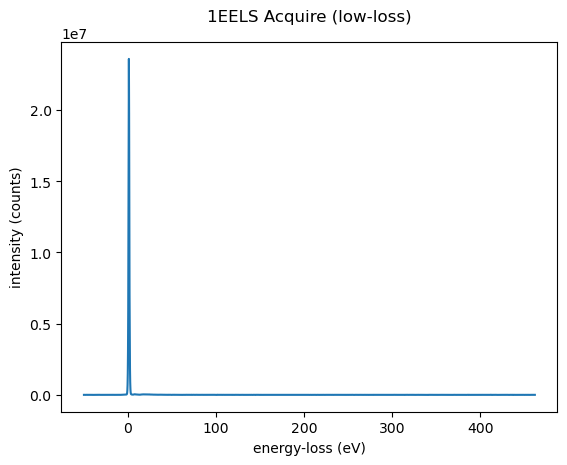

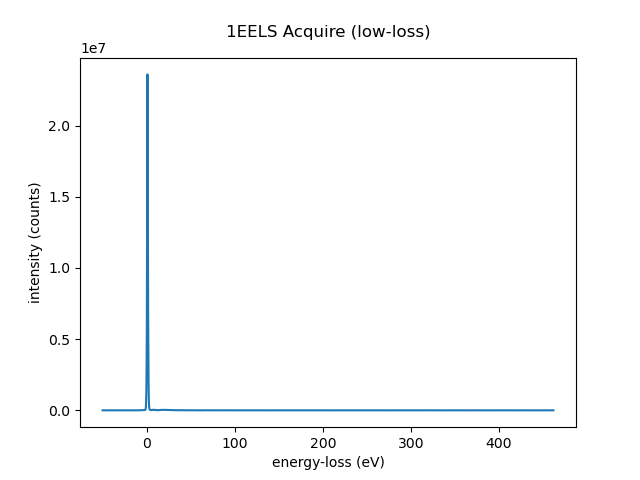

In [89]:
ll = infoWidget.low_loss.dataset
zero_loss_fit_width = infoWidget.low_loss.low_loss_tab[5, 0].value
print(zero_loss_fit_width)

ll.plot()
#vplt.plot(ll.energy_loss, ll)

In [93]:
infoWidget.datasets['resolution_functions'].metadata

{'experiment': {'single_exposure_time': 0.01,
  'exposure_time': 0.21,
  'number_of_frames': 21,
  'collection_angle': 0.0,
  'convergence_angle': 30.0,
  'acceleration_voltage': 0.0,
  'flux_ppm': 115.68867492675781,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([1.0174319]),
  'startFitEnergy': -0.3,
  'endFitEnergy': 0.3,
  'fit_parameter': array([-1.49985841e-01,  2.33687317e+03,  1.33828265e+00,  2.36651224e-01,
          1.09947513e+04,  1.72584231e+00]),
  'original_low_loss': '1EELS Acquire (low-loss)_new'}}

In [ ]:
s = infoWidget.low_loss.parent.dataset
energy_offset = s.get_spectral_dims(return_axis=True)[0][0]
energy_offset

In [25]:
view = core_loss.plot()

core_loss.metadata['zero_loss']['shifted']

NameError: name 'core_loss' is not defined

100%|██████████████████████████████████████████████████████████████████████████| 2046/2046 [00:00<00:00, 130983.97it/s]


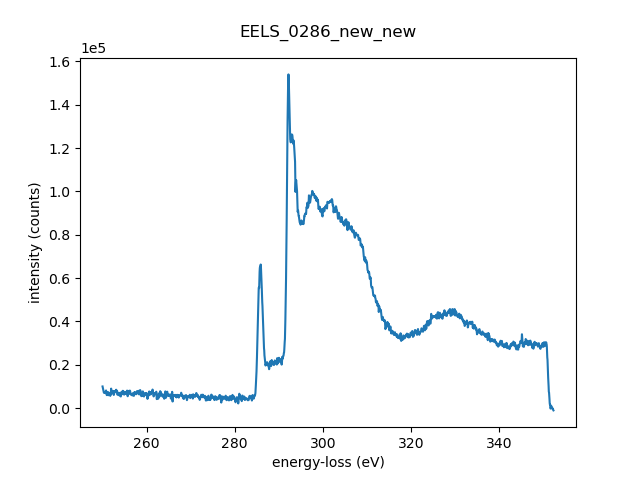

In [42]:
from tqdm import tqdm, trange, auto

dataset = infoWidget.selected_dataset
dataset.original_metadata.keys()
dataset_np = np.array(dataset)
for i in trange(1,len(dataset.energy_loss)-1):
    if np.abs(dataset_np[i] - dataset_np[i+1]) > 1e3  and np.abs(dataset_np[i] - dataset_np[i-1]) > 1e3:
        dataset_np[i] = (dataset_np[i-1] + dataset_np[i+1])/2
        pass
core_loss = dataset.like_data(dataset_np)

core_loss = eels_tools.shift_energy(core_loss, np.array([-0.2791726]))
view = core_loss.plot()

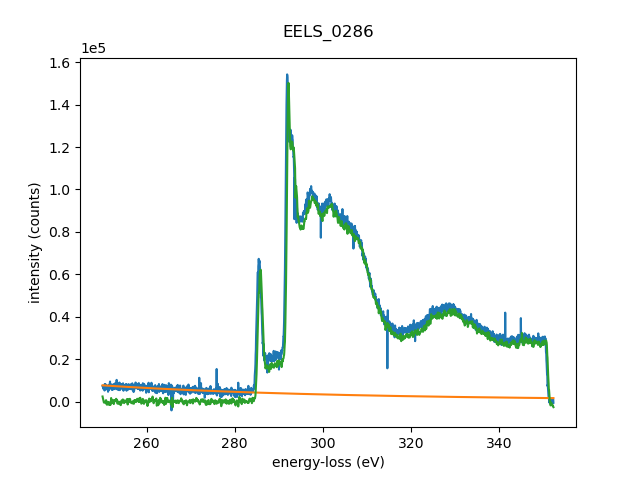

In [43]:
background, p = eels_tools.power_law_background(core_loss, core_loss.energy_loss, [250, 278])
spectrum = core_loss-background
spectrum.metadata = dataset.metadata.copy()
dataset.plot()
plt.gca().plot(spectrum.energy_loss, background)
plt.gca().plot(spectrum.energy_loss, spectrum)

Everything we did in the dashboard above we do now one by one:
### Fix energy scale and determine resolution function
> please see [Fitting the Zero-Loss Peak](./CH4_02-Fit_Zero_Loss.ipynb) for details

### Determine Relative Thickness 
The probabaility of an low-loss function in a solid angle is then:
$$\frac{\partial^2 P}{(\partial E \partial \Omega) }= t*  \frac{e}{\pi^2 a_0 m_0 v^2} {\rm Im} \left[ \frac{-1}{\varepsilon(q,E)} \right]
         \left( \frac{1}{\theta^2+\theta_E^2}\right)$$
         
>See [Notebook: Analysing Low-Loss Spectra with Drude Theory](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_03-Drude.ipynb) of the MSE672-Introduction-to-TEM Lecture in my Github account.




[-0.23899302] sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment']


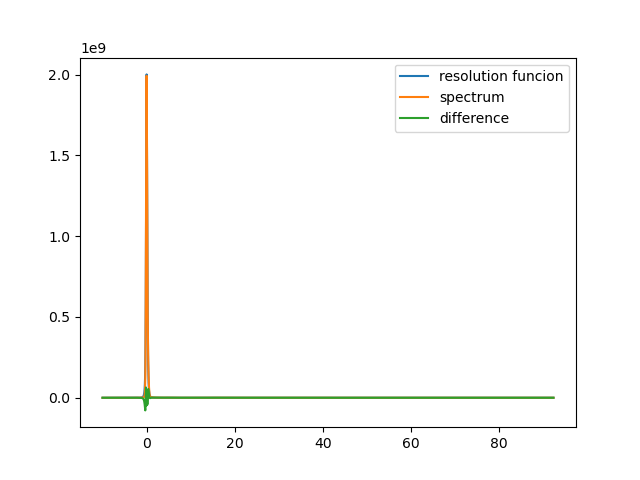

In [49]:
low_loss = eels_tools.align_zero_loss(infoWidget.selected_dataset)
zero_loss = eels_tools.get_resolution_functions(low_loss, -.5, .5)
plt.close('all')
plt.figure()
plt.plot(low_loss.energy_loss, zero_loss, label='resolution funcion')
plt.plot(low_loss.energy_loss, low_loss, label = 'spectrum')
plt.plot(low_loss.energy_loss, low_loss-zero_loss, label = 'difference')
plt.legend()

In [7]:
infoWidget.dataset.metadata

{'experiment': {'acceleration_voltage': 200000.0,
  'beam_current': 0,
  'collection_angle': 50.0,
  'convergence_angle': 30.0,
  'count_conversion': 1,
  'exposure_time': 10.0,
  'flux_ppm': 0.0,
  'number_of_frames': 10000,
  'single_exposure_time': 0.001},
 'peak_fit': {'edge_model': array([0., 0., 0., ..., 0., 0., 0.]),
  'fit_end': 30.0,
  'fit_start': 1.0,
  'peak_model': array([0., 0., 0., ..., 0., 0., 0.]),
  'peak_out_list': array([[1.14401631e+01, 2.92439760e+06, 2.45501896e+01],
         [7.97104419e-01, 2.89095444e+07, 1.71055819e+00]]),
  'peaks': {'0': {'amplitude': 20986284.461096264,
    'associated_edge': '',
    'position': 0.8433632583641564,
    'type': 'Gauss',
    'width': 1.6347046209768021,
    'asymmetry': 0.0},
   '1': {'amplitude': 60297550.94024267,
    'associated_edge': '',
    'asymmetry': 0.0,
    'position': 0.3943234078051374,
    'type': 'Gauss',
    'width': 0.8462042318305517},
   '2': {'amplitude': 5149807.779796465,
    'associated_edge': '',
    

## peakfit

In [ ]:
from pyTEMlib import peak_dialog
    
peakFitWidget = peak_dialog.PeakFitWidget({'low_loss':infoWidget.dataset})

###### from pyTEMlib import peak_dialog

In [65]:
    
peakFitWidget = peak_dialog.PeakFitWidget({'core_loss': spectrum})

AppLayout(children=(GridspecLayout(children=(Button(description='Fit Area', layout=Layout(grid_area='widget001…

In [51]:
fi.metadata


{'experiment': {'single_exposure_time': 5.0,
  'exposure_time': 100.0,
  'number_of_frames': 20,
  'collection_angle': 50.0,
  'convergence_angle': 5.4,
  'acceleration_voltage': 60000.0,
  'flux_ppm': 1470027.5390625,
  'count_conversion': 1,
  'beam_current': 0}}

In [34]:
datasets = {'core_loss': spectrum, 'dataset': core_loss}
low_loss.metadata = infoWidget.selected_dataset.metadata
peakFitWidget = peak_dialog.PeakFitWidget(datasets)

AppLayout(children=(GridspecLayout(children=(Button(description='Fit Area', layout=Layout(grid_area='widget001…

In [48]:
datasets = {'core_loss': spectrum, 'dataset': core_loss}
pyTEMlib.file_tools.save_dataset(datasets)

C:\Users\gduscher\AppData\Local\anaconda3\envs\py11\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\envs\py11\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


<HDF5 group "/Measurement_000" (2 members)>

Help on function gauss in module pyTEMlib.eels_tools:

gauss(x, p)
    Gaussian Function
    
    p[0]==mean, p[1]= amplitude p[2]==fwhm
    area = np.sqrt(2* np.pi)* p[1] * np.abs(p[2] / 2.3548)
    FWHM = 2 * np.sqrt(2 np.log(2)) * sigma = 2.3548 * sigma
    sigma = FWHM/3548


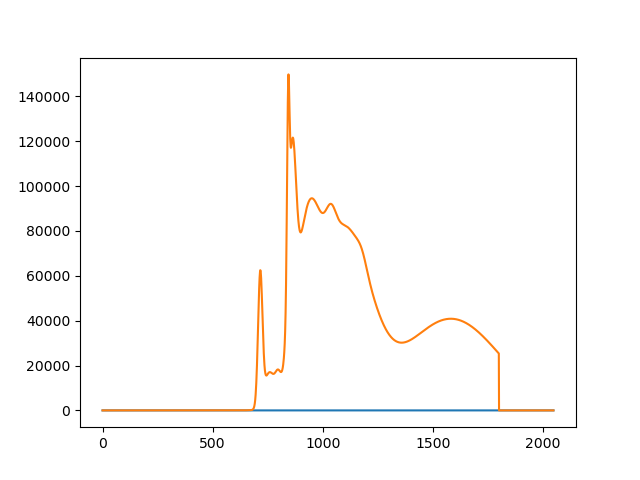

In [59]:

model = spectrum.metadata['peak_fit']['peak_model'].copy()
spectrum.energy_loss -= 250
spectrum.energy_loss *= 0.05
spectrum.energy_loss += 250 

import scipy
help(eels_tools.gauss)
gauss = eels_tools.gauss(spectrum.energy_loss, [spectrum.energy_loss[1024], 1, .2])
gauss2 = eels_tools.gauss(spectrum.energy_loss, [spectrum.energy_loss[1024], 1, .1])
plt.figure()
plt.plot(gauss)
plt.plot(model)

In [58]:
spectrum.energy_loss.values[:4]

array([12.5 , 12.55, 12.6 , 12.65])

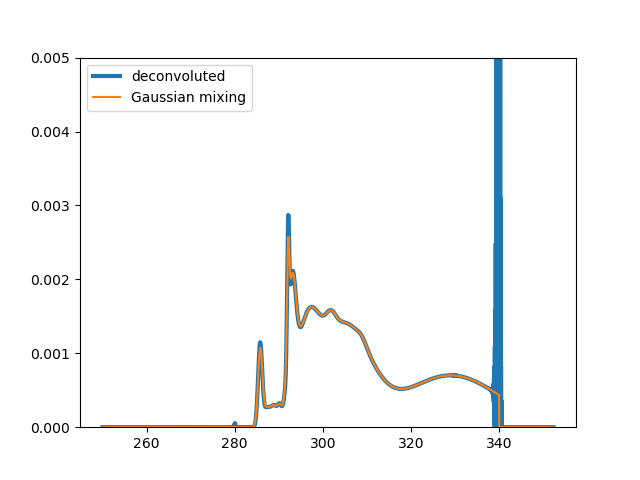

In [69]:
spectrum = infoWidget.dataset.copy()
model = spectrum.metadata['peak_fit']['peak_model']
zero_loss = np.array(np.roll(zero_loss, -np.argmax(np.array(zero_loss))))
j = np.fft.fft(model/model.sum())
z = np.fft.fft(zero_loss/zero_loss.sum()+1e-12)
#z2 = np.fft.fft(gauss2/gauss2.sum()*2)

red =(np.fft.ifft(j/z).real)#
plt.figure()
plt.plot(spectrum.energy_loss, red/red.sum(), label='deconvoluted', linewidth=3)
#plt.plot(zero_loss/zero_loss.sum())
plt.plot(spectrum.energy_loss, model/model.sum(), label='Gaussian mixing')
# plt.plot(red-model)
plt.ylim(0,.005)
plt.legend()

In [66]:
for peak in spectrum.metadata['peak_fit']['peaks'].values():
    print (f"{peak['position']:.1f}, {peak['width']:.2f}, {peak['amplitude']:.0f}")

285.8, 1.15, 58843
304.8, 13.34, 77560
293.0, 2.01, 80868
292.1, 0.64, 74606
296.5, 6.59, 64373
301.8, 2.73, 12192
308.9, 2.47, 3753
287.2, 2.06, 13455
290.2, 0.99, 6659
329.1, 26.32, 40827
289.0, 1.82, 11961


In [29]:
peakFitWidget.fit_peaks()



NameError: name 'peakFitWidget' is not defined

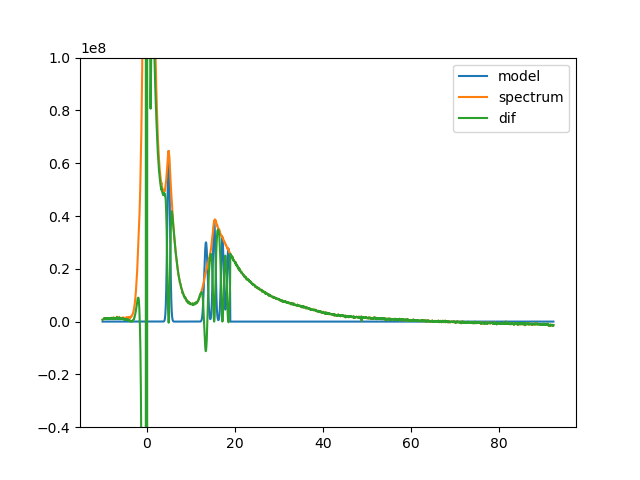

In [33]:
plt.close('all')
plt.figure()
plt.plot(peakFitWidget.energy_scale,peakFitWidget.peak_model, label='model')
plt.plot(peakFitWidget.energy_scale,peakFitWidget.dataset, label='spectrum')
plt.plot(peakFitWidget.energy_scale, peakFitWidget.dataset-peakFitWidget.peak_model-resolution_functions, label='dif')
plt.ylim(-4e7,1e8)
plt.legend()

In [215]:
dataset = peakFitWidget.dataset
peak_model, peak_out_list = find_peaks(dataset-resolution_functions, -1,  30)
print(peak_out_list.reshape([int(len(peak_out_list)/3),3]))
plt.figure()
plt.plot(peak_model)
plt.plot(dataset-resolution_functions)

ValueError: too many values to unpack (expected 2)

In [9]:
infoWidget.datasets['Channel_000'].metadata

{'experiment': {'single_exposure_time': 5.0,
  'exposure_time': 100.0,
  'number_of_frames': 20,
  'collection_angle': 50.0,
  'convergence_angle': 5.42,
  'acceleration_voltage': 60000.0,
  'flux_ppm': 1477088.59375,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([-0.2791726])},
 'peak_fit': {'fit_start': 270.05000372603536,
  'fit_end': 350.3000052496791,
  'peaks': {'0': {'position': 285.5328133398505,
    'amplitude': 56813.851980084386,
    'width': 1.1447315680844505,
    'type': 'Gauss',
    'associated_edge': '',
    'asymmetry': 0.0},
   '1': {'position': 291.8502789181616,
    'amplitude': 80137.36537116366,
    'width': 0.631699853337263,
    'type': 'Gauss',
    'associated_edge': '',
    'asymmetry': 0.0},
   '2': {'position': 292.68460898549887,
    'amplitude': 67856.46722391486,
    'width': 1.6722959462172458,
    'type': 'Gauss',
    'associated_edge': '',
    'asymmetry': 0.0},
   '3': {'position': 288.33077096412796,
    'amplitude': 

In [28]:
import scipy
def residuals_ll(p, x, y, only_positive_intensity):
    """part of fit"""

    err = (y - model_ll(x, p, only_positive_intensity)) / np.sqrt(np.abs(y))
    return err

def model_ll(x, p, only_positive_intensity):
    """part of fit"""

    y = np.zeros(len(x))

    number_of_peaks = int(len(p) / 3)
    for i in range(number_of_peaks):
        if only_positive_intensity:
            p[i * 3 + 1] = abs(p[i * 3 + 1])
        p[i * 3 + 2] = abs(p[i * 3 + 2])
        if p[i * 3 + 2] > abs(p[i * 3]) * 4.29193 / 2.0:
            p[i * 3 + 2] = abs(p[i * 3]) * 4.29193 / 2.  # ## width cannot extend beyond zero, maximum is FWTM/2

        y = y + gauss(x, p[i * 3:])

    return y

def gauss(x, p):  # p[0]==mean, p[1]= amplitude p[2]==fwhm,
    """Gaussian Function

        p[0]==mean, p[1]= amplitude p[2]==fwhm
        area = np.sqrt(2* np.pi)* p[1] * np.abs(p[2] / 2.3548)
        FWHM = 2 * np.sqrt(2 np.log(2)) * sigma = 2.3548 * sigma
        sigma = FWHM/3548
    """
    if p[2] == 0:
        return x * 0.
    else:
        return p[1] * np.exp(-(x - p[0]) ** 2 / (2.0 * (p[2] / 2.3548) ** 2))

def find_peaks(dataset, fit_start, fit_end):
    energy_scale = dataset.get_spectral_dims(return_axis=True)[0].values

    start_channel = np.searchsorted(energy_scale, fit_start)
    end_channel = np.searchsorted(energy_scale, fit_end)
    spectrum = np.abs(np.array(dataset)[start_channel:end_channel])
    i_pk = scipy.signal.find_peaks_cwt(spectrum, widths=range(3, len(energy_scale) // 30)) # 
    
    p_in = np.ravel([[energy_scale[i]-fit_start, spectrum[i], .7] for i in i_pk])
    
    return p_in
    
def fit_peaks(spectrum, pin, start_fit, end_fit, only_positive_intensity=False):

    energy_scale =  spectrum.get_spectral_dims(return_axis=True)[0]
    start_fit = np.searchsorted(energy_scale, start_fit)
    end_fit = np.searchsorted(energy_scale, end_fit)
    
    fit_energy = energy_scale[start_fit:end_fit]
    spectrum = np.array(spectrum)
    fit_spectrum = spectrum[start_fit:end_fit]

    #pin_flat = [item for sublist in pin for item in sublist]
    [p_out, _] = leastsq(residuals_ll, np.array(pin), args=(fit_energy, fit_spectrum,
                                                                        only_positive_intensity))
    #p_out, pcov = curve_fit(residuals_ll, fit_energy, fit_spectrum, p0=np.array(pin))
    p = []
    for i in range(int(len(pin)/3)):
        if only_positive_intensity:
            p_out[i * 3 + 1] = abs(p_out[i * 3 + 1])
        p.append([p_out[i * 3], p_out[i * 3 + 1], abs(p_out[i * 3 + 2])])
    return p_out


fit_end = 40
peak_out_list = find_peaks(infoWidget.selected_dataset-resolution_functions, -1, fit_end)
p = fit_peaks(dataset-resolution_functions,peak_out_list,-1, fit_end)
model = model_ll(energy_scale,np.array(p), False)

print(len(peak_out_list)/3)

print(fit_end)
print(p.reshape([int(len(p)/3),3]))
print(len(p)/3)
plt.figure()
plt.plot(energy_scale, model)
plt.plot(energy_scale, dataset-resolution_functions)
plt.plot(energy_scale, dataset-resolution_functions-model)
plt.ylim(0,1e8)


NameError: name 'resolution_functions' is not defined

23.0
1877529801.672969
23.0


C:\Users\gduscher\AppData\Local\anaconda3\envs\py11\Lib\site-packages\scipy\optimize\_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 14000.
  warnings.warn(errors[info][0], RuntimeWarning)


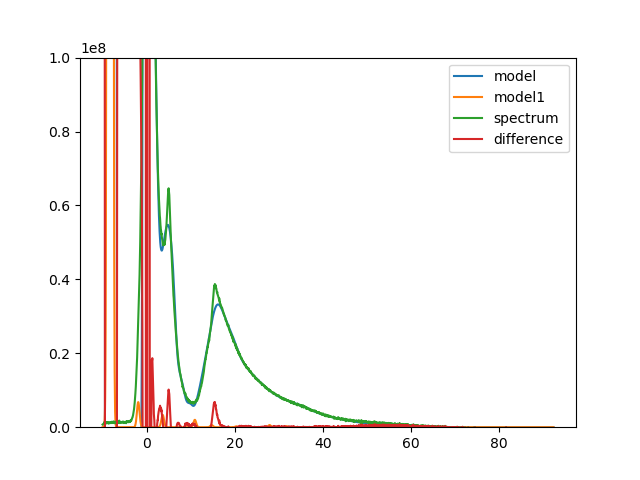

In [254]:
peak_out_list2 = find_peaks(infoWidget.selected_dataset-resolution_functions-model, -1, fit_end)
peak_out_list = np.append(peak_out_list,peak_out_list2)
print(len(peak_out_list)/3)
p = fit_peaks(dataset-resolution_functions,peak_out_list,-1, fit_end )
model = model_ll(energy_scale,np.array(p), False)
model2 = model_ll(energy_scale,np.array(peak_out_list2), False)
print(np.std(np.array(dataset-resolution_functions)-model))
print(len(p)/3)
plt.figure()
plt.plot(energy_scale, model+resolution_functions, label='model')
plt.plot(energy_scale, model2, label='model1')
plt.plot(energy_scale, dataset, label='spectrum')
plt.plot(energy_scale, dataset-resolution_functions-model, label='difference')
plt.ylim(0,1e8)
plt.legend()

[-1198221.9850117   2628210.59194557  4581554.52393588 ...
 -2260492.70274396 -2410574.75171163 -2582093.5075449 ]
(2048,)
11.0


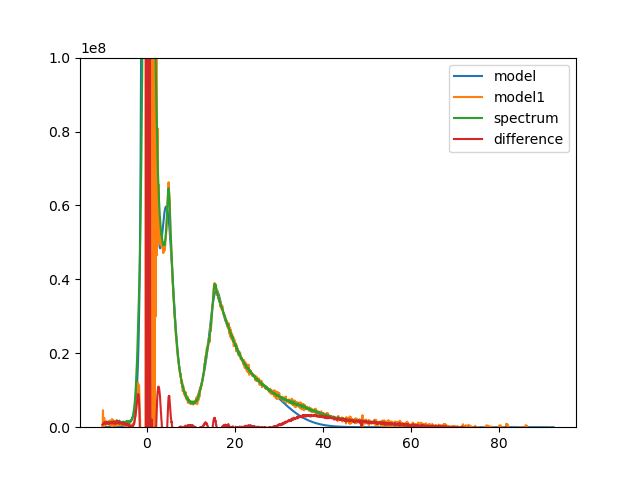

In [237]:
model[:130] = 0.
model2_f = scipy.fft.fft(np.array(dataset)) #model+np.array(resolution_functions))

res_f =scipy.fft.fft(np.array(resolution_functions))
smear = gauss(energy_scale, [0,1, .2])
smear *= resolution_functions.sum()/smear.sum()
gaus_f = scipy.fft.fft(smear)  # p[0]==mean, p[1]= amplitude p[2]==fwhm,
model2 =  scipy.fft.ifft(model2_f/res_f*gaus_f).real
print(model2)
#model2 = model+np.array(resolution_functions)
print(model2.shape)
print(len(p)/3)
plt.figure()
plt.plot(energy_scale, model+resolution_functions, label='model')
plt.plot(energy_scale, model2, label='model1')
plt.plot(energy_scale, dataset, label='spectrum')
plt.plot(energy_scale, dataset-resolution_functions-model, label='difference')
plt.ylim(0,1e8)
plt.legend()

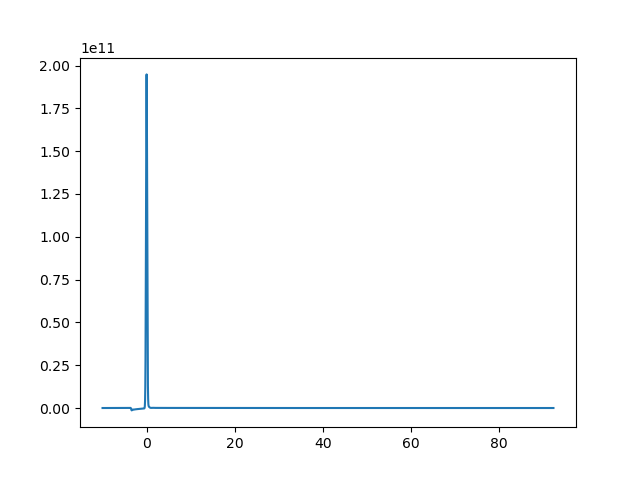

In [193]:
plt.figure()
#plt.plot(energy_scale, model+resolution_functions)
plt.plot(energy_scale, model2)

In [86]:
np.append([1,2,3], [4,5,6])

array([1, 2, 3, 4, 5, 6])

In [224]:
plt.close('all')

In [97]:




peak_model, peak_out_list = eels_tools.find_peaks(infoWidget.selected_dataset, 1,40)

new_list = np.reshape(peak_out_list, [len(peak_out_list) // 3, 3])
area = np.sqrt(2 * np.pi) * np.abs(new_list[:, 1]) * np.abs(new_list[:, 2] / np.sqrt(2 * np.log(2)))
arg_list = np.argsort(area)[::-1]
area = area[arg_list]
peak_out_list = new_list[arg_list]

number_of_peaks = np.searchsorted(area * -1, -np.average(area))

peak_model, peak_out_list[0], number_of_peaks

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([2.03888490e+01, 6.60088441e+05, 9.51555853e+00]),
 7)

In [94]:
peak_model, peak_out_list[0], number_of_peaks

(19, 3)

In [80]:
peakmodel, peak_out_list, number_of_peaks = smooth(infoWidget.selected_dataset, 1, False)

In [39]:
def smooth(dataset, iterations, advanced_present):
    """Gaussian mixture model (non-Bayesian)

    Fit lots of Gaussian to spectrum and let the program sort it out
    We sort the peaks by area under the Gaussians, assuming that small areas mean noise.

    """

    # TODO: add sensitivity to dialog and the two functions below
    
    # peaks = dataset.metadata['peak_fit']

    peaks ={'fit_start':1,
            'fit_end': 40}

    peak_model, peak_out_list = eels_tools.find_peaks(dataset, peaks['fit_start'], peaks['fit_end'])
    peak_out_list = [peak_out_list]

    flat_list = [item for sublist in peak_out_list for item in sublist]
    new_list = np.reshape(flat_list, [len(flat_list) // 3, 3])
    area = np.sqrt(2 * np.pi) * np.abs(new_list[:, 1]) * np.abs(new_list[:, 2] / np.sqrt(2 * np.log(2)))
    arg_list = np.argsort(area)[::-1]
    area = area[arg_list]
    peak_out_list = new_list[arg_list]

    number_of_peaks = np.searchsorted(area * -1, -np.average(area))

    return peak_model, peak_out_list, number_of_peaks


In [27]:
len(peakFitWidget.peak_out_list)

6

In [62]:
peakFitWidget.sidebar[7,0].value = 2

In [47]:

options = list(peakFitWidget.sidebar[7,0].options)
options.insert(-1, (f'Peak {len(options)}', len(options)-1))
len(options), options

(7,
 [('Peak 1', 0),
  ('ll', -2),
  ('Peak 3', 2),
  ('Peak 4', 3),
  ('Peak 5', 4),
  ('Peak 6', 5),
  ('add peak', -1)])

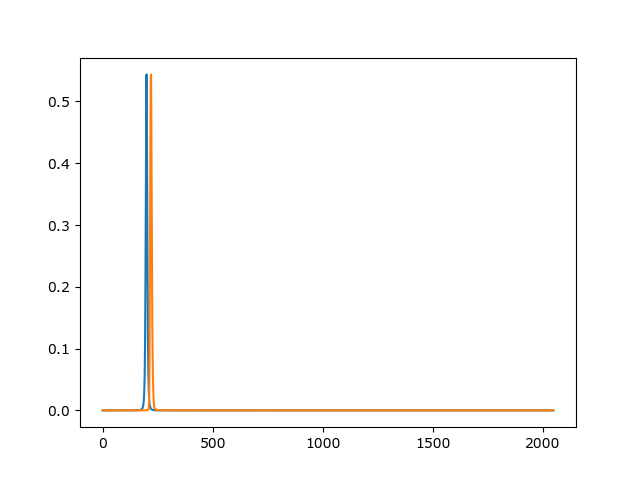

In [ ]:
plt.figure()
plt.plot(resolution_functions)
plt.plot(eels_dataset)

In [ ]:
                                                        
view = resolution_functions.plot()
view.gca().plot(eels_dataset.energy_loss, eels_dataset)
eels_dataset.metadata


In [11]:
energy_shift = resolution_functions.metadata['low_loss']['shifts']
fwhm = resolution_functions.metadata['low_loss']['widths']

t_mfp = np.log(eels_dataset.sum(axis=2)/resolution_functions.sum(axis=2))

plt.figure()
ax1 = plt.subplot(131)
plt.imshow(energy_shift)
plt.colorbar()
plt.title(f' energy shift - mean: {np.mean(energy_shift):.2f}, std {np.std(energy_shift):.3f}')
ax2 = plt.subplot(132)
plt.imshow(fwhm)
plt.colorbar()
plt.title(f' peak widths - mean: {np.mean(fwhm):.2f}, std {np.std(fwhm):.3f}')
ax3 = plt.subplot(133)
plt.imshow(t_mfp)
plt.colorbar()
plt.title(f' thickness - mean: {np.mean(np.array(t_mfp)):.2f}, std {np.std(np.array(t_mfp)):.3f}')

AttributeError: 'tuple' object has no attribute 'metadata'

## Shift energy scale

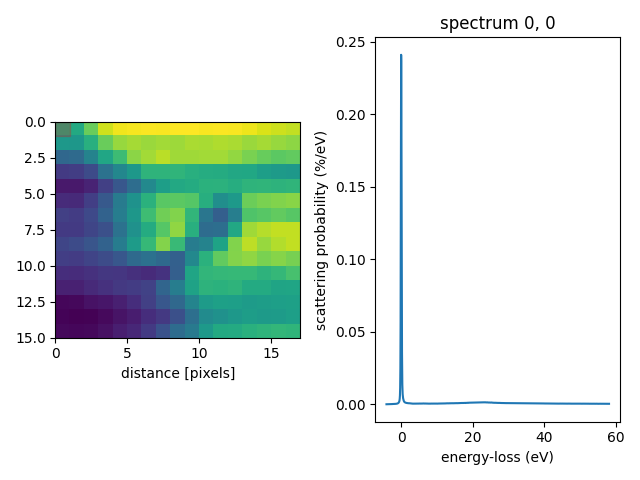

In [6]:
eels_dataset.metadata['low_loss'].update(resolution_functions.metadata['low_loss'])
shifted_dataset = eels_tools.shift_on_same_scale(eels_dataset)
view = shifted_dataset.plot()

c:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


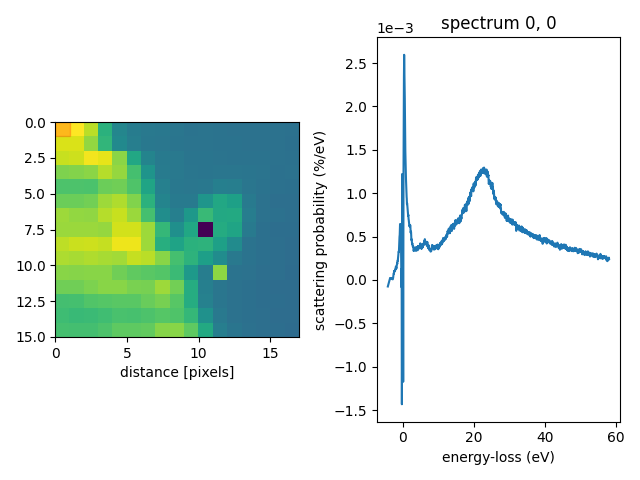

In [7]:
shifted_resolution_functions = eels_tools.get_resolution_functions(shifted_dataset, zero_loss_fit_width=.9)
dif = shifted_dataset - shifted_resolution_functions
view = dif.plot()

In [8]:
datasets = fileWidget.datasets
#datasets['energy_corrected'] = shifted_dataset
#datasets['energy_corrected_resolution_function'] = shifted_resolution_functions

infoWidget= interactive_eels.InfoWidget(datasets)

c:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


ValueError: array of sample points is empty

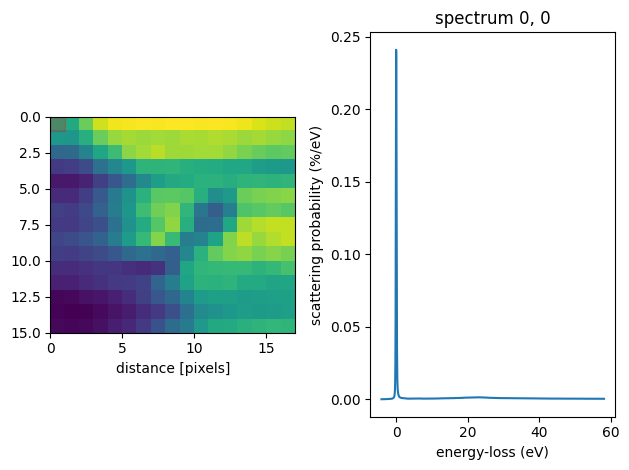

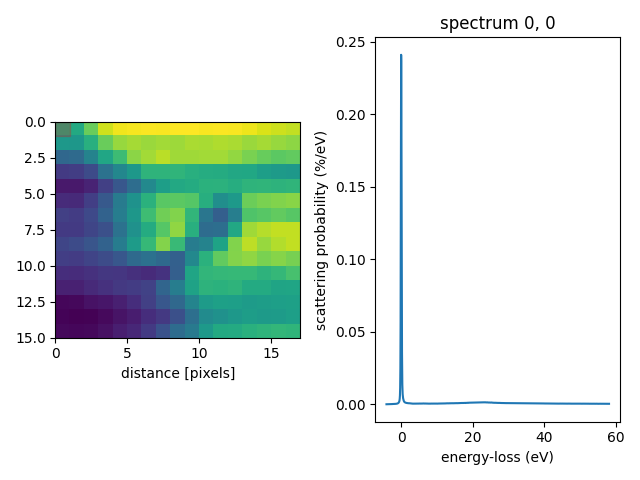

In [15]:
v = shifted_dataset.plot()


In [40]:
FWHM, energy_shift = eels_tools.fix_energy_scale(eels_dataset)

print(f'Zero Loss with energy resolution of {FWHM:.2f} eV at position {energy_shift:.3f} eV')
eels_dataset.energy_loss -= energy_shift

zero_loss, _ = eels_tools.resolution_function(eels_dataset.energy_loss, eels_dataset, .4)
print(zero_loss)
plt.figure()
plt.plot(eels_dataset.energy_loss, eels_dataset, label='spectrum')
plt.plot(eels_dataset.energy_loss, zero_loss, label = 'zero-loss')
plt.plot(eels_dataset.energy_loss, np.array(eels_dataset)-zero_loss , label = 'difference')

plt.title ('Lorentzian Product Fit of Zero-Loss Peak')
#plt.xlim(-5,30)
plt.legend();
Izl = zero_loss.sum()
Itotal = np.array(eels_dataset).sum()
tmfp = np.log(Itotal/Izl)
print(f'Sum of Zero-Loss: {Izl:.3f} %')
print(f'Sum of Spectrum: {Itotal:.3f} %')
print (f'thickness [IMFP]: {tmfp:.5f}')

ValueError: object of too small depth for desired array

## Fitting a Drude Function to Plasmon

The position and the width are important materials parameters and we can derive them by fitting the Drude function to the volume plasmon region.
### Drude Function

Most of the inelastically scattered electron arise from interaction with outer shell electrons. These interactions, therefore, have a high intensity and are easy to obtain. 

The energy-loss function $F_{el}$ on the other hand is determined by the dielectric function $\varepsilon$ through:

$$
F_{el} = \Im \left[\frac{-1}{\varepsilon(\omega)} \right]
$$

The dielectric function in the Drude theory is given by two input parameters the position of the plasmon energy $E_p$
and the width of the plasmon $\Gamma$

$$ ε(ω) = ε1 + iε2 = 1 + χ = 1 − \frac{\omega_p^2}{\omega^2+\Gamma^2} + \frac{i\Gamma \omega_p^2}{\omega(\omega^2+\Gamma^2)}$$
Here $\omega$ is the angular frequency (rad/s) of forced oscillation and $\omega_p$ is the natural or resonance frequency for plasma oscillation, given by
$$ ω_p = \sqrt{\frac{ne^2}{(ε_0m_0)}} $$
A transmitted electron represents a sudden impulse of applied electric field, containing
all angular frequencies (Fourier components). Setting up a plasma oscillation of the loosely bound outer-shell electrons in a solid is equivalent to creating a pseudoparticle of energy $E_p = \hbar \omega_p$, known as a plasmon (Pines, 1963).

In [5]:
from scipy.optimize import leastsq, curve_fit
eels_dataset = spec
def Drude(E,Ep,Ew, gamma=1):
    eps = 1 - Ep**2/(E**2+Ew**2) +1j* Ew* Ep**2/E/(E**2+Ew**2)
    eps = 1 - (Ep**2 - Ew * E * 1j) / (E**2 + 2 * E * gamma * 1j)  # Mod drude ter
    elf = (-1/eps).imag
    return eps,elf

def errfDrude(p, y, x):
    eps,elf = Drude(x,p[0],p[1])
    err = y - p[2]*elf
    #print (p,sum(np.abs(err)))
    return np.abs(err)#/np.sqrt(y)


pin2 = np.array([9,1,.7, 1.11])
E = energy_scale = eels_dataset.energy_loss
startFit =np.argmin(abs(energy_scale-6))
endFit = np.argmin(abs(energy_scale-15))
    
p2, lsq = leastsq(errfDrude, pin2, args=(eels_dataset[startFit:endFit], energy_scale[startFit:endFit]), maxfev=2000)

eps, elf =Drude(energy_scale,p2[0],p2[1],p2[3])
drudePSD = p2[2]* elf
plt.figure()

plt.plot(energy_scale,eels_dataset)
plt.plot(energy_scale,drudePSD)
plt.plot(energy_scale,eels_dataset-drudePSD)
plt.axhline(0, color='black')

#plt.gca().set_xlim(0,40)
#plt.gca().set_ylim(-0.01,0.2)
print(f"Drude Theory with Plamson Energy: {p2[0]:2f} eV and plasmon Width {p2[1]:.2f} eV") 
print(f"Max of Plasmon at {energy_scale[drudePSD.argmax(0)]:.2f} eV")
print(f"Amplitude of  {p2[2]:.2f} was deteremined by fit ")
p2


NameError: name 'spec' is not defined

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\gduscher\AppData\Local\Temp\ipykernel_17524\467939617.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(energy_scale,eps.real,label = 'Re($\epsilon)$')
C:\Users\gduscher\AppData\Local\Temp\ipykernel_17524\467939617.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(energy_scale,eps.imag,label = 'Im($\epsilon)$')


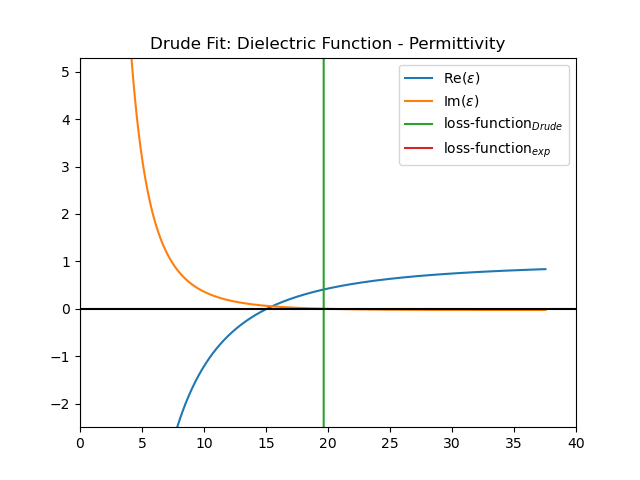

In [157]:
plt.figure()
plt.title ('Drude Fit: Dielectric Function - Permittivity')
plt.plot(energy_scale,eps.real,label = 'Re($\epsilon)$')
plt.plot(energy_scale,eps.imag,label = 'Im($\epsilon)$')
plt.plot(energy_scale,drudePSD,label = 'loss-function$_{Drude}$')
plt.plot(energy_scale,eels_dataset,label = 'loss-function$_{exp}$')
plt.axhline(0, color='black')

plt.gca().set_xlim(0,40)
plt.gca().set_ylim(-2.5,5.3)

plt.legend();

173


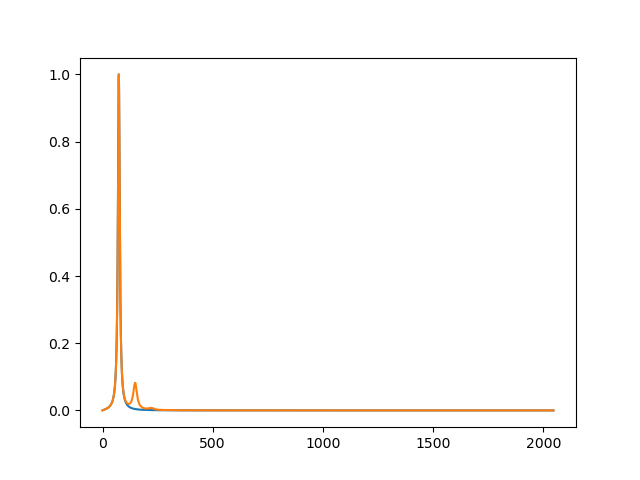

In [27]:
tmfp = .3
zl2 = zero_loss
        
LLene = np.arange(1,2048)/5

zero_loss, _ = eels_tools.resolution_function(eels_dataset.energy_loss, eels_dataset, .4)

ZP = np.array(zl2).argmax(0) # zl peak position 
print(ZP)

_, SSD = Drude(LLene,15, 2 )
PSD = np.zeros(len(LLene))
FAC = 1.

ssd  = np.fft.fft(SSD)
ssd2 = ssd.copy()
SSD2 = SSD.copy()
for order in range(20):
    # This order convoluted spectum 
    PPSD = np.zeros(len(LLene))
    # convoluted SSD is SSD2
    SSD2 = np.fft.ifft(ssd).real

    # scale right (could be done better? GERD)
    mult = sum(SSD)/sum(SSD2)

    SSD2 *= mult.real/np.exp(-tmfp)
    EP = np.array(SSD2).argmax(0)
    PPSD = SSD2/FAC*np.power(tmfp,(order))*np.exp(-tmfp)*1e12
    # Add this order t0 final spectrum
    PSD += PPSD
    # Get next order factor
    FAC=FAC*(order+2.)

    # convolute next order
    ssd = ssd * ssd2




            
plt.figure()
plt.plot(SSD/SSD.max())
plt.plot(PSD/PSD.max())

229957.93374337783 45464262.67521657


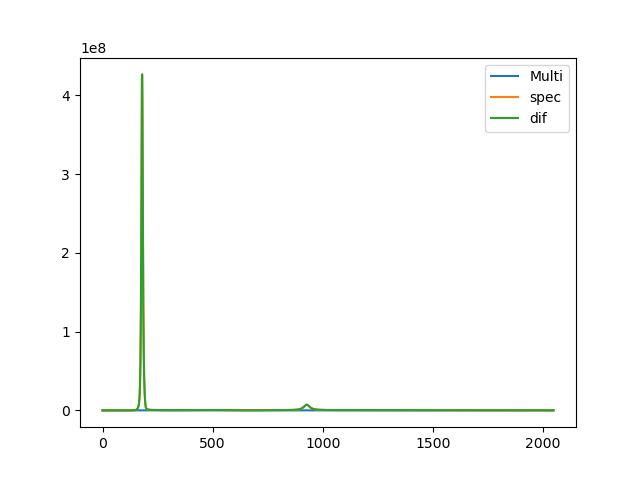

In [ ]:
from scipy.interpolate import splev,splrep,splint
def MakeDrudeVL(dataset, tmfp, zero_loss, Ep, Ew, Eh):
        energy_scale = np.arange(1,2049)/5
        
        ZP = np.array(zero_loss).argmax(0) # zl peak position 
        _, PSD = Drude(energy_scale,Ep, Ew )
        PSD /= PSD.sum()
        
        FAC = 1.

        ### sum contribution from each order of scattering:
        ssd  = np.fft.fft(PSD)
        
        SSD_sum = PSD.sum()
        ssd2 = ssd.copy()
        PSD /= FAC*np.power(tmfp,(0))*np.exp(-tmfp)
        for order in range(1,15):
            FAC=FAC*(order+2.)
            ssd *= ssd2   
            # convoluted SSD is SSD2
            SSD2 = np.fft.ifft(ssd).real

            # scale right (could be done better? GERD)
            mult = SSD_sum/sum(SSD2)

            SSD2 *= mult.real/np.exp(-tmfp)
            EP = np.array(SSD2).argmax(0)
            PPSD = SSD2/FAC*np.power(tmfp,(order))*np.exp(-tmfp)
            # Add this order t0 final spectrum
            PSD += PPSD
            
            # convolute next order
        dispersion = dataset.energy_loss.slope
        
        factorZL =  Eh/dispersion*2 #, #zero_loss.sum()*(np.exp(tmfp)-1)/PSD.sum()*Eh/dispersion/4
        #print(factorZL, Eh)
        
        BGDcoef = splrep(energy_scale,PSD,s=0)
        
        cts =splev( dataset.energy_loss, BGDcoef)*factorZL #*p[1]
        
        #cts += zero_loss
        
        return cts
    
    

#zero_loss, _ = eels_tools.resolution_function(eels_dataset.energy_loss, eels_dataset, .4)
#Izl = zero_loss.sum()
#Itotal = np.array(eels_dataset).sum()
#tmfp = np.log(Itotal/Izl)
tmfp = 0.3
zero_loss = infoWidget.datasets['resolution_function']

LL = MakeDrudeVL(spec, tmfp, zero_loss, p0[0]-5,.5, p0[2])
print(LL.max(), LL.sum())
plt.figure()
plt.plot(LL, label='Multi')
plt.plot(eels_dataset, label='spec')
plt.plot(eels_dataset-LL, label='dif')
plt.legend()
#plt.ylim(-.1,.2)

C:\Users\gduscher\AppData\Local\Temp\ipykernel_17524\2622750204.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


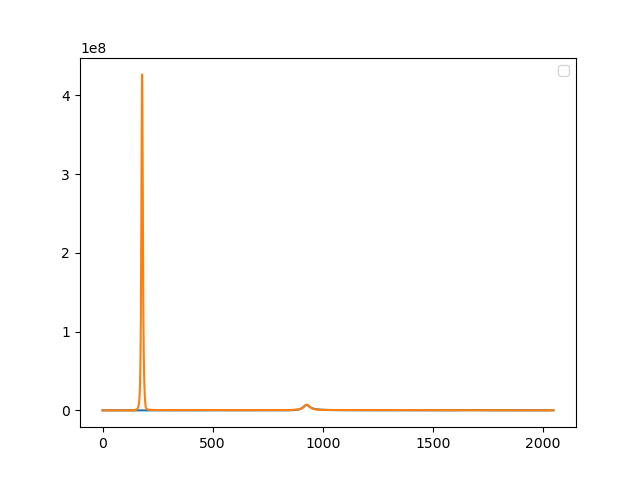

In [162]:

def errfDrude(p, y):
    LL = MakeDrudeVL(y, p[3], zero_loss, p[0],p[1],p[2])
    err = y - LL
    #print (p,sum(np.abs(err)))
    return np.abs(err)#/np.sqrt(y)


pin2 = np.array([15,1,.7, 0.3])
E = energy_scale = eels_dataset.energy_loss
startFit =np.argmin(abs(energy_scale-13))
endFit = np.argmin(abs(energy_scale-18))
    
p2, lsq = leastsq(errfDrude, pin2, args=(eels_dataset), maxfev=2000)

LL = MakeDrudeVL(eels_dataset, p2[3], zero_loss, p2[0],p2[1],p2[2])
plt.figure()
plt.plot(LL)
plt.plot(eels_dataset)
plt.legend()


In [38]:
p2[3]

0.8326588466281821

In [34]:
np.power(0.3,(0))*np.exp(-.3)

0.7408182206817179

In [35]:
zero_loss.sum()

array(1.68808473)

In [6]:
def newDrudeBgd(x, p):
    tmfp = 500  #p[3]
    startB = x[0]
    endB = x[-1]
    p = np.abs(p)


    LLene = np.linspace(1, 2047,2048)
    eps = pyTEMlib.eels_tools.drude(LLene,p[0], p[1], p[2])
    SSD = (-1/eps).imag
    ssd  = np.fft.fft(SSD)

    ssd2 = ssd.copy()
    SSD2 = SSD.copy()

    ### sum contribution from each order of scattering:
    PSD = np.zeros(len(LLene))
    for order in range(1):
        # This order convoluted spectum 
        PPSD = np.zeros(len(LLene))
        # convoluted SSD is SSD2
        SSD2 = np.fft.ifft(ssd).real

        # scale right (could be done better? GERD) 
        print( sum(SSD)/sum(SSD2))
        mult = sum(SSD)/sum(SSD2)
        SSD2 *= abs(mult)

        PPSD = SSD2/scipy.special.factorial(order+1)*np.power(tmfp,(order+1))*np.exp(-tmfp) #using equation 4.1 of egerton ed2
       # Add this order to final spectrum
        PSD += PPSD

        # next order convolution
        ssd = ssd * ssd2


    cts = np.zeros(len(x))

    if startB < 0:
        startB = 0
    BGDcoef = scipy.interpolate.splrep(LLene[int(startB):int(endB)],PSD[int(startB):int(endB)],s=0)


    lin = np.zeros(len(x))

    cts = scipy.interpolate.splev( x, BGDcoef)*p[1]
    return cts

In [7]:
LLene = np.linspace(1, 2047,2048)
p = p0
eps = pyTEMlib.eels_tools.drude(LLene,p[0], p[1], p[2])
SSD = (-1/eps).imag

plt.figure()
plt.plot(SSD)

NameError: name 'p0' is not defined

In [8]:
newDrudeBgd( np.array(spec.energy_loss[200:]), p0)

NameError: name 'spec' is not defined

In [9]:
def DrudeBgd(y, x, imfp, p):



        # Fit function is the spectrum - new LL bgd devided by poinson noise
        def newLL(p, y, x):
            
            err = (y - newDrudeBgd( x,p))
            #print(p, sum( err))
            return err

        # Least square fit
        pDLLBgd, lsq = scipy.optimize.leastsq(newLL, p0, args=(y, x), maxfev=2000)
        #print(sum(newLL(pZL, y, x)))
        # cts is the result of the fit
        cts=newDrudeBgd(x, abs(pDLLBgd))
        #print("new LLL background ", pZL)
        #tags['DrudeLLBgd'] = pDLLBgd
        print(pDLLBgd)
        
        
        return cts

In [133]:
infoWidget.datasets['plasmon'].metadata

{'experiment': {'single_exposure_time': 0.1,
  'exposure_time': 10.0,
  'number_of_frames': 100,
  'collection_angle': 100.0,
  'convergence_angle': 0.0,
  'microscope': 'Libra 200 MC',
  'acceleration_voltage': 199990.28125,
  'flux_ppm': 4875.3037109375,
  'count_conversion': 1,
  'beam_current': 0},
 'zero_loss': {'shifted': array([-0.14012023]),
  'startFitEnergy': -0.5,
  'endFitEnergy': 0.5,
  'fit_parameter': array([-1.63207010e-02,  2.06835590e+04,  1.92327897e-01,  3.38795374e-02,
          2.25742582e+04,  2.93662067e-01]),
  'original_low_loss': 'EELS90muOAonaxis3_new_new'},
 'plasmon': {'parameter': array([1.50312722e+01, 7.45905381e-01, 3.48811157e+05]),
  'epsilon': array([     0.           +0.j        ,      0.           +0.j        ,
              0.           +0.j        , ...,
         293283.07757369+9900.8221703j , 293342.39439935+9892.35528781j,
         293401.61631948+9883.90252999j])}}

1.0000000000000007
1.0000000000000007
1.0000000000000007
0.9999999999999997
1.0
0.9999999999999997
1.0000000000000007
1.0000000000000007
[1.50312722e+01 7.45905381e-01 3.48811157e+05 1.70000000e+01]


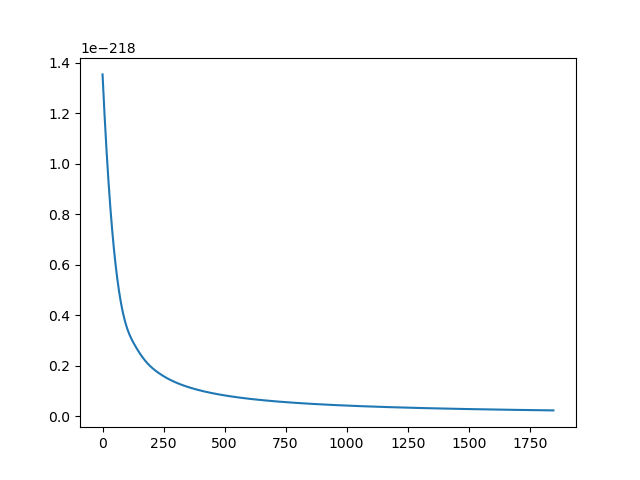

In [10]:
import scipy
p0 = np.zeros(4)
#if 'Drude P Pos' in tags:
p0[:3] = [1.50312722e+01, 7.45905381e-01, 3.48811157e+05]
#p0[0] = tags['Drude P Pos']
#p0[1] = tags['Drude P Width']
#p0[2] = tags['Drude P thick']
p0[3] = 17. #tags['Drude P Assym']
spec = infoWidget.dataset
spec.energy_loss[200]

cts = DrudeBgd(np.array(spec[200:]), np.array(spec.energy_loss[200:]), .15, p0)

plt.figure()
plt.plot(cts)

In [37]:
def PMFP(ssdLL, energy_scale):
        # Calculate plasmon mean free paths using a free-electron formula Eq.(3.58)
        # with m = m0 and assuming small width of the plasmon peak.
        # Equally good for calculating total-inelastic MFP using a value of
        # Em in Eq.(5.38) or a more approximate value using Eq.(5.2).
        # Probe convergence alpha incorporated using Scheinfein & Isaacson formula.
        # Above values assume dipole conditions (beta* < Bethe-ridge angle).
        # The program also estimates a total-inelastic MFP by using dipole formula
        # with effective collection angle bstar = Bethe-ridge angle.
        # To obtain this value, enter alarge value (~ 100 mrad) for alpha or beta.
        E0 = 200000            #Incident-electron energy E0 (keV): ');
        Ep = energy_scale[0]+ssdLL.argmax(0)*(energy_scale[1]-energy_scale[0]) #'Plasmon energy of mean energy loss (eV): ');
        print(Ep, ssdLL.argmax(0))
        alpha = 10 #'Convergence semiangle (mrad) [can be 0]: ');
        beta  = 30 #'Collection semiangle (mrad): ');
        
        F = (1.0+E0/1022.0)/(1.0+E0/511.0)**2;
        Fg = (1.0+E0/1022.0)/(1.0+E0/511.0);
        T = E0*F; #keV
        tgt = 2.0*Fg*E0;
        a0 = 0.0529;  #nm
        #print('2.gamma.T = ',tgt);

        # calculation of convergence correction
        #tgt=2.*E0.*(1.+E0./1022.)./(1.+E0./511.); % keV
        thetae=(Ep+1e-6)/tgt;          # in mrad, avoid NaN for e=0
        a2=alpha*alpha*1e-6 + 1e-10;  #radians^2, avoiding inf for alpha=0
        b2=beta*beta*1e-6;            #radians^2
        t2=thetae*thetae*1e-6;        #radians^2
        eta1=np.sqrt((a2+b2+t2)**2-4*a2*b2)-a2-b2-t2;
        eta2=2*b2*np.log(0.5/t2*(np.sqrt((a2+t2-b2)**2+4*b2*t2)+a2+t2-b2));
        eta3=2*a2*np.log(0.5/t2*(np.sqrt((b2+t2-a2)**2+4*a2*t2)+b2+t2-a2));
        eta=(eta1+eta2+eta3)/a2/np.log(4/t2);
        f1=(eta1+eta2+eta3)/2/a2/np.log(1+b2/t2);
        f2=f1;
        if(alpha/beta>1):
            f2=f1*a2/b2;

        bstar=thetae*np.sqrt(np.exp(f2*np.log(1+b2/t2))-1); #% mrad
        #print('effective semiangle beta* = %g mrad\n',bstar);
        bstar = 40
        
        thetabr = 1000 * (Ep/E0/1000.0)**0.5;
        print('Bethe Ridge Angle', thetabr)
        #print('Bethe-ridge angle(mrad) = ',tags['Bethe Ridge Angle'],'nm\n')

        pmfp = 0.0
        imfp = 0.0
        if (bstar < thetabr):
            pmfp = 4000*a0*T/Ep/np.log(1+bstar**2/thetae**2);
            imfp = 106*F*E0/Ep/np.log(2.0*bstar*E0/Ep);
            #print('Free-electron   MFP(nm) = %g nm\n',pmfp);
            #print('Using Eq.(5.2), MFP(nm) = %g nm\n',imfp);
            
        else:
            #print('Dipole range is exceeded\n');
            imfp = 4000*a0*T/Ep/np.log(1+thetabr**2/thetae**2);
            #print('total-inelastic MFP(nm) = %g nm\n',imfp);
        

        return pmfp, imfp

In [48]:
Ep = np.array(eels_dataset.energy_loss)[0]+np.array(ssdLL).argmax(0)*(np.array(eels_dataset.energy_loss)[1]-np.array(eels_dataset.energy_loss)[0])
Ep,  np.array(ssdLL).argmax(0)

(15.040794864773837, 920)

In [51]:
PMFP(np.array(ssdLL), np.array(eels_dataset.energy_loss))

15.040794864773837 920
Bethe Ridge Angle 0.27423343035426806


(0.0, 219.06514501302627)

0.17584541453708571


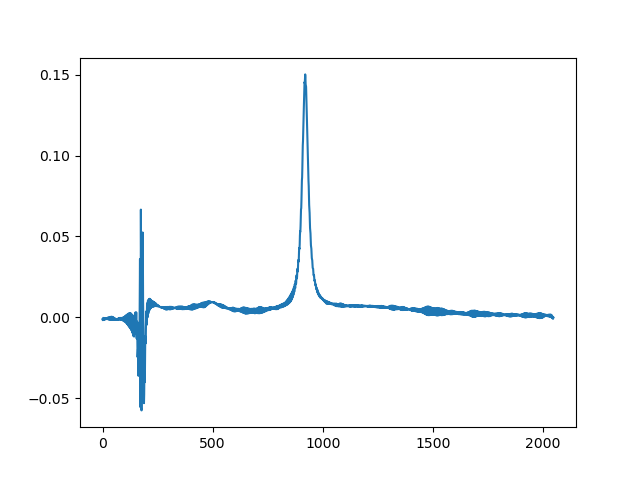

In [30]:
# Use resolution Function as ZL if existing
# print len(LLSpec)
LLSpec = eels_dataset
zero_loss, _ = eels_tools.resolution_function(eels_dataset.energy_loss, eels_dataset, .4)

j = np.fft.fft(eels_dataset)
z = np.fft.fft(zero_loss)
j1 = z*np.log(j/z)
ssdLL =np.fft.ifft(j1).real#,'fourier-log deconvolution')

#parent.text2.append('\n Single Scattering Deconvolution, Done')
if np.array(eels_dataset).sum() > 0.0:          
    tmfp = np.log(np.array(eels_dataset).sum()/zero_loss.sum())
else:
    tmfp = 0.0
Ep = np.array(eels_dataset.energy_loss)[0]+np.array(ssdLL).argmax(0)*(np.array(eels_dataset.energy_loss)[1]-np.array(eels_dataset.energy_loss)[0])

print(tmfp)
plt.figure()
plt.plot(ssdLL)

In [77]:
def drude(dataset,  ep, ew, tnm, eb, verbose=False):
       
    
    e0 = 200
    beta = 30
    e = dataset.energy_loss
    epc = e[1]-e[0]

    b = beta/1000.0 # %rad
    T = 1000.0*e0*(1.+e0/1022.12)/(1.0+e0/511.06)**2;# %eV # equ.5.2a or Appendix E p 427 
    tgt = 1000*e0*(1022.12 + e0)/(511.06 + e0);# %eV  Appendix E p 427 
    rk0 = 2590*(1.0+e0/511.06)*np.sqrt(2.0*T/511060);
    os = e[0]
    ewMod = eb
    eps = 1 - (ep**2-ewMod*e*1j)/(e**2+2*e*ew*1j) #Mod Drude term
    eps[np.nonzero(eps==0.0)]= 1e-19
    elf = np.imag(-1/eps)

    the = e/tgt; #% varies with energy loss! # Appendix E p 427 
    srfelf=np.imag(-4./(1.0+eps))-elf; #% for 2 surfaces
    angdep = np.arctan(b/the)/the - b/(b*b+the*the);
    srfint = angdep*srfelf/(3.1416*0.05292*rk0*T); #% probability per eV
    anglog = np.log(1.0+ b*b/the/the);
    I0 = eels_dataset.sum() *1     
    volint = abs(tnm/(np.pi*0.05292*T*2)*elf*anglog); #S equ 4.26% probability per eV
    volint = (volint+srfint) *I0  *epc #S probability per channel
    ssd = volint #+ srfint;
    if os <-1.0:
        xs = int(abs(-os/epc))

        ssd[0:xs]=0.0
        volint[0:xs]=0.0
        srfint[0:xs]=0.0
        
        Ps = np.trapz(e,srfint); #% 2 surfaces but includes negative begrenzungs contribn.
        Pv = abs(np.trapz(e,abs(volint/np.array(eels_dataset)))); #% integrated volume probability
        Pv = (volint/I0).sum() ## our data have he same epc and the trapz formula does not include 
        lam = tnm/Pv; #% does NOT depend on free-electron approximation (no damping). 
        lamfe = 4.0*0.05292*T/ep/np.log(1+(b* tgt / ep) **2); #% Eq.(3.44) approximation
    if verbose:
        print('Ps(2surfaces+begrenzung terms) =', Ps, 'Pv=t/lambda(beta)= ',Pv,'\n');
        print('Volume-plasmon MFP(nm) = ', lam,' Free-electron MFP(nm) = ',lamfe,'\n');
        print('--------------------------------\n');

            
    return ssd#/np.pi

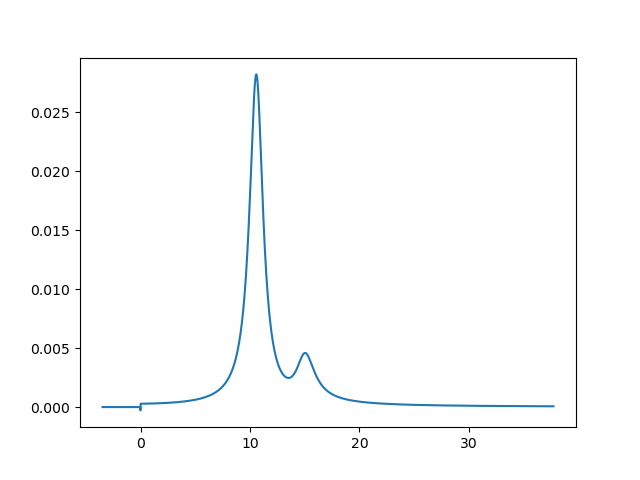

In [81]:
ssd = drude(eels_dataset,  15, .5, 3, 1)
plt.figure()
plt.plot(eels_dataset.energy_loss, ssd)

In [ ]:
def doSSD(LLSpec):
        
        # Use resolution Function as ZL if existing
        # print len(LLSpec)
        extract_zero_loss(LLSpec)
        
        j = np.fft.fft(LLSpec)
        z = np.fft.fft(tags['zero_loss'])
        z2 = z ## Could be a zl extracted from Spectrum
        j1 = z2*np.log(j/z)
        ssdLL =np.fft.ifft(j1).real#,'fourier-log deconvolution')
        tags['ssdLL']=ssdLL.copy()
        
        
        #parent.text2.append('\n Single Scattering Deconvolution, Done')
        if np.array(LLSpec).sum() > 0.0:          
            tmfp = np.log(np.array(LLSpec).sum()/tags['zero_loss'].sum())
        else:
            tmfp = 0.0

        # Use resolution function if available, use ZL otherwise
        zl2 = tags['zero_loss']
        
        
        #####################
        ####### for SSD convoluted Spectra
        #####################
        startE = (6.0-tags['offset'])/tags['dispersion']
        SSD = ssdLL.copy()
        SSD2 = SSD.copy()
        SSD2[0:startE]=0.0
        EP = np.array(SSD2).argmax(0) # plasmon peak position
        ZP = np.array(zl2).argmax(0) # zl peak position 
        #print ('\n EP: ',EP,startE, tags['offset']+EP*tags['dispersion'])


        guess = [tags['offset']+EP*tags['dispersion'], 10000.0, 6.0, 0.98]
        pin = np.array(guess)

        def errfct(p, y, x):
            err = (y - Lorentzian(x,p))
            return err

        def Lorentzian(x,p):
            y = ((0.5 *  p[1]* p[2]/3.14)/((x- p[0])**2+(( p[2]/2)**2)))
            return y

        p, lsq = leastsq(errfct, pin, args=(SSD, tags['ene']), maxfev=2000)
        tags['PLpos'] = p[0]
        tags['PLwidth'] = p[2]
        tags['PLarea'] = p[1]
        #parent.text2.insertPlainText('\n Position 1  Amplitude 1,  Width 1,  \n')
        #parent.text2.insertPlainText(str(p[0:3]))
        PL1 =  Lorentzian(tags['ene'],p)

        pmfp, imfp = PMFP()
        startxE = tags['Drude Fit Start']
        endxE = tags['Drude Fit End']
        startx = (startxE-tags['offset'])/tags['dispersion']
        endx = (endxE-tags['offset'])/tags['dispersion']

        if p[0] < startxE:
            p[0] = startxE
        if p[0] > endxE:
            p[0] = endxE
        if p[2] > (endxE-startxE)/2.0:
            p[2] = (endxE-startxE)/2.0
        
        
        guess = [p[0],p[2],tmfp*imfp,0.1,1.0]
        guess = [22,10,50,0.1,1.0]
        pin2 = np.array(guess)

        
        def errfDrude(p, y, x):
            p = abs(p)
            if p[0] < startxE:
                p[0] = startxE
            if p[0] > endxE:
                p[0] = endxE
            if p[1] > endxE-startxE/3.0:
                p[1] = endxE-startxE/3.0
            if p[2] > 200:
                p[2] = 200
            if p[2]<0:
                p[2] =0
            if p[3] > 10:
                p[3] = 10
            if p[3]<0:
                p[3] =0
            if not tags['Drude Fit Asymm'] :
                p[3] = 0
            
            err = (y - drude(x,p[0],p[1],p[2],abs(p[3])))

            y[np.nonzero(y<=0)] = 1e-12
            return np.abs(err)/np.sqrt(y)
        
        

        
        p2, lsq = leastsq(errfDrude, pin2, args=(tags['spec'][startx:endx], tags['ene'][startx:endx]), maxfev=2000)
        p2[3] = abs(p2[3])
        drudePSD = drude(tags['ene'],p2[0],p2[1],p2[2],abs(p2[3]))
        tags['Drude SSD'] = drudePSD
        
        tags['Drude P Pos'] = p2[0]
        tags['Drude P Width'] = p2[1]
        tags['Drude P thick'] = p2[2]
        tags['Drude P Assym'] = abs(p2[3])
        Pv = drudePSD.sum()/tags['spec'].sum()
        tags['Drude P Probab'] = Pv
        tags['Drude P IMFP'] =  p2[2]/Pv #(Wave vs. intensity)
        #tags['Drude P/LL IMFP',p2[2]/tmfp,'nm')
        tags['LLthick'] = tmfp

        e = 1.60217646E-19; #% electron charge in Coulomb
        eps0 =  8.854187817*1e-12 # vacuum permittivity
        mel = 9.109e-31; #% REST electron mass in kg
        h = 4.135667516*1e-15; #% Planck's constant
        hbar = h/2.0/np.pi;

        tags['Drude e- density']= np.sqrt( (p2[0]/hbar)**2/e**2*eps0*mel)*1e-7 #gerd true? /nm^2

        tags['Drude VL'] = MakeDrudeVL()
        
        
        return tmfp

## Surface Plasmon

Spectra from thin specimen show the excitations of the surface plasmons on each side of the specimen. For any normal specimen these surface plasmons do interact, but this is not true for extremely thick specimen ($>> 10$nm).
The surface plasmon frequency $\omega_S$ for thin specimen  is related to the bulk plasmon frequency $\omega_P$ by Ritchie [Ritchie-PR1957]:  
$$
\omega_S=\omega_P\left[  \frac{1\pm \exp(-q_st) }{1+\varepsilon} \right]^{1/2}
$$


The symmetric mode, where like charges face one another, corresponds to the higher angular frequency $q_s$. Please note, that this relationship does only apply for large $q_s$

The differential probability for surface excitation at both surfaces of a sample with thickness $t$ can be expressed (normal incident, no retardation effects) by:
$$
\frac{d^2 P_s}{d\Omega d E}=\frac{2\hbar}{\pi^2 \gamma a_0 m_0^2 \mu^3}\frac{\theta}{(\theta^2+\theta^2_E)^2} \Im\left[  \frac{(\varepsilon_a - \varepsilon_b)^2 } {\varepsilon_a^2 \varepsilon_b}\right]
$$
with 
$$
R_c = \frac{\varepsilon_a \sin^2(tE/2\hbar\mu)}{\varepsilon_b + \varepsilon_z }\tanh (q_s t/2) 
+ \frac{\varepsilon_a \cos^2(tE/2\hbar\mu)}{\varepsilon_b + \varepsilon_a} \coth (q_s t/2) 
$$
and $\varepsilon_a$ and $\varepsilon_b$ are the permitivities of the two surfaces.


A secondary effect of the surface excitation is the reduced intensity of the bulk plasmon peak. The effect is usually smaller than 1\%, but can be larger for spectra with small collection angle, because the preferred scattering of surfuce losses into small angles.
The correction for surface plasmon will be discussed in the Kramers--Kronig Analysis.



## Summary

The beauty of ``Low--Loss spectroscopy`` is its derivation of the dielectric function to high energies without prior knowledge of the composition. The signal is strong and the acquisition time is mostly restricted by the dynamic range of the spectrum.


**Think of low-loss spectroscopy as Electrodynamics**

The advantages of EELS is the derivation of these values spatially resolved.
And from a linescan across an Si/SiO$_2$ interface the dielectric function per pixel can be obtained. From that we can calculate the dielectric polarizability $\alpha_e (E)$, which may be  a measure of the dielectric strength.


We obtain more or less easily:
- relative thickness
- absolute thickness 
- inelastic mean free path
- plasmon frequency
- plasmon width
- band gap
- dielectric function
- reflectivity 
- absorption
- effective number of electrons per atoms 
 


The analysis of the optical data requires the exact knowledge of the zero-loss peak. Because of the weighting in the Fourier Analysis, the low energy part contributes heavily to the dielectric function. Therefore, energy resolution is critical for an exact determination of all the optical values from EELS. The new monochromated TEMs are now able to achieve an energy resolution of 10 meV (one is at the oak Ridge National Laboratory), which allows for a sharper zero-loss peak. Such a sharp zero-loss peak will enable us to extract this low energy data more accurately. The dielectric function and the parameters derived from it, can be more precisely determined from such EELS spectra.


## Navigation
- <font size = "3">  **Up Chapter 4: [Imaging](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Back: [Zero-Loss](CH4_02-Fit_Zero_Loss.ipynb)** </font>
- <font size = "3">  **Next: [Introduction to Core-Loss](./CH4_07-Introduction_Core_Loss.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>